In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.1.2'

In [3]:
# OS_2012_01 = pd.read_excel('OSEncerrada_2012_01.xls',skiprows=3,header=2,parse_dates=True,dayfirst=True)
# OS_2012_02 = pd.read_excel('OSEncerrada_2012_02.xls',skiprows=3,header=2,parse_dates=True,dayfirst=True)
# OS_2012_03 = pd.read_excel('OSEncerrada_2012_03.xls',skiprows=3,header=2,parse_dates=True,dayfirst=True)
# OS_2013_01 = pd.read_excel('OSEncerrada_2013_01.xls',skiprows=3,header=2,parse_dates=True,dayfirst=True)

# Lista de aquisição e desativação de equipamentos

In [4]:
lista_eqp = pd.read_excel('.\ListaEqpt\ListaEqptos.xls',skiprows=3,header=2,dtype={'Patrimônio': str})
lista_eqp = lista_eqp.drop(['Localização','Modelo','Fornecedor','Núm. Doc. da Aquisição','Nota Fiscal','Garantia',
                            'Parecer Desativação','Contrato','Vida Útil','Equipamento Crítico',
                               'Descrição Complementar'], axis=1)
lista_eqp['Aquisição'] = pd.to_datetime(lista_eqp['Aquisição'],dayfirst=True)
lista_eqp['Data Desativação'] = pd.to_datetime(lista_eqp['Data Desativação'],dayfirst=True)
lista_eqp.sort_values(by=['Aquisição'], inplace=True)

### Pré-filtragem

#### Descarte

Deleta datas com erro (com valor -1, o qual foi transformado em data anterior a 1900 pelo argumento "parse_dates")

In [5]:
lista_eqp = lista_eqp.drop(lista_eqp[lista_eqp['Aquisição'] < pd.to_datetime(1900, format='%Y')].index)

Exclui elementos marcados como desativados (Desativado==SIM), mas sem data de desativação

In [6]:
# lista_eqp[(lista_eqp['Desativado']=='SIM') & (pd.notna(lista_eqp['Data Desativação'])]

In [7]:
lista_eqp = lista_eqp.drop(lista_eqp[(lista_eqp['Desativado']=='SIM') & (pd.isna(lista_eqp['Data Desativação']))].index)

Descarta equipamentos marcados como ativos (Desativado==NÃO), mas sem data de desativação e dados como baixados (Baixado=SIM)

In [8]:
lista_eqp = lista_eqp.drop(lista_eqp[(lista_eqp['Desativado']=='NÃO') & (pd.isna(lista_eqp['Data Desativação'])) & ((lista_eqp['Baixado']=='SIM'))].index)

#### Considera ativo (retira data de desativação, se houver)

Considera ativos (retira data de desativação) equipamentos marcados como ativos (Desativado==NÃO) e como não baixados (Baixado==NÃO), mesmo que tenham data de desativação

In [9]:
is_not_disabled = lista_eqp['Desativado']=='NÃO'
is_not_down = lista_eqp['Baixado']=='NÃO'
has_disable_date = pd.notna(lista_eqp['Data Desativação'])

In [10]:
# is_not_disabled = lista_eqp['Desativado']=='NÃO'
lista_eqp[(is_not_disabled & has_disable_date & is_not_down)]

,U.S.,Orgão,Patrimônio,N.º Série,Tipo Equipamento,Classe,Marca,Valor (R$),Aquisição,Data Desativação,Desativado,Permitir O.S.,Baixado,NEC,N.º Quebras,N.º Serviço Externo,N.º Peças Utilizadas,Custo Serviço Externo (R$),Custo Peça (R$)
835,HC,AMBULATORIO DE OFTALMO,15/05172,13904,CADEIRA EXAME TRATAMENTO OFTALMOLOGICO,Equipamento,DABI ATLANTE,0.0,1982-04-30,2015-04-27 09:09:50.000,NÃO,SIM,NÃO,CEB,2.0,NaN,NaN,NaN,NaN
4972,HC,IMUNOLOGIA,02/07701,28977,MICROSCOPIO LAB,Equipamento,OLYMPUS,528790.7,1987-10-23,2012-03-29 14:48:47.000,NÃO,SIM,NÃO,CEB,3.0,NaN,NaN,NaN,NaN
8586,HC,DIVISAO DE UNIDADE DE EMERGENCIA REFERENCIADA,15/22405,9003IN083,VENTILADOR UTI,Equipamento,NEWPORT,12000.0,1990-11-22,2019-02-19 16:23:11.981,NÃO,SIM,NÃO,CEB,18.0,3.0,14.0,6707.94,2448.80
8525,HC,DIVISAO DE AMB. E PROC. ESPECIALIZADO,15/22408,9006IN166,VENTILADOR UTI,Equipamento,NEWPORT,12000.0,1990-11-22,2019-02-19 16:21:02.693,NÃO,SIM,NÃO,CEB,21.0,2.0,20.0,6642.74,1399.86
8296,HC,CENTRO CIRURGICO AMBULATORIAL,ERC/08109,1125601X,UNI EXTRACAO CATARATA FACUEMULSIFICACAO,Equipamento,ALLERGAN HUMPHREY,0.0,1992-01-01,2017-07-20 08:44:36.893,NÃO,NÃO,NÃO,CEB,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,HC,CME,CEB/02175,NaN,CAMISA,Equipamento,KARL STORZ,0.0,2015-05-26,2015-06-01 13:24:57.000,NÃO,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN
5865,HC,PNEUMOLOGIA/ UNIDADE RESPIRATORIA,15/46697,6006747764,MONITOR FISIOLOGICO MULTIUSO,Equipamento,DRAGER,14800.0,2015-05-28,2017-11-24 14:46:34.481,NÃO,SIM,NÃO,CEB,1.0,NaN,2.0,NaN,0.60
4944,HC,DIVISAO DE CENTRO CIRURGICO,15/48192,6636161802,MICROSCOPIO CIRURGICO,Equipamento,CARL ZEISS,328240.0,2017-04-05,2019-08-13 15:41:12.762,NÃO,SIM,NÃO,CEB,6.0,NaN,2.0,NaN,6365.00
8737,HC,BRONCOSCOPIA,758591,1B087K290,VIDEO BRONCOSCOPIO FLEXIVEL,Equipamento,FUJINON,50000.0,2017-11-08,2019-07-12 09:44:04.701,NÃO,SIM,NÃO,CEB,3.0,1.0,NaN,NaN,NaN


In [11]:
lista_eqp.loc[lista_eqp[is_not_disabled & has_disable_date & is_not_down].index , ['Data Desativação']] = pd.NaT

Considera ativos (retira data de desativação) equipamentos marcados como desativados (Desativado==SIM) e com data de desativação, mas que estejam com permitir OS (Permitir O.S.==SIM) E não baixados (Baixado==NÃO)

In [12]:
is_disabled = lista_eqp['Desativado']=='SIM'
has_disable_date = pd.notna(lista_eqp['Data Desativação'])
allow_OS = lista_eqp['Permitir O.S.']=='SIM'
is_not_down = lista_eqp['Baixado']=='NÃO'

In [13]:
lista_eqp[(is_disabled & has_disable_date & allow_OS & is_not_down)]

,U.S.,Orgão,Patrimônio,N.º Série,Tipo Equipamento,Classe,Marca,Valor (R$),Aquisição,Data Desativação,Desativado,Permitir O.S.,Baixado,NEC,N.º Quebras,N.º Serviço Externo,N.º Peças Utilizadas,Custo Serviço Externo (R$),Custo Peça (R$)
1665,HC,SERVICO DE ANATOMIA PATOLOGICA,15/24048,298102,CENTRIFUGA MICRO-AMOSTRA,Equipamento,INCIBRAS,1266.66,1967-01-01,2018-03-05 08:41:43.705,SIM,SIM,NÃO,CEB,3.0,NaN,14.0,NaN,20.81
8012,HC,ENFERMARIA C4P2,ERC/02168,E310-0755-004,ULTRASSOM,Equipamento,SHIMADZU,0.00,1967-01-01,2018-07-23 14:31:27.393,SIM,SIM,NÃO,CEB,1.0,NaN,8.0,NaN,32.97
8087,HC,DIVISAO DE AMB. E PROC. ESPECIALIZADO,15/36664A,60403011961,UMIDIFICADOR AQUECEDOR,Equipamento,FISHER PAYKEL,0.00,1967-01-01,2018-09-17 11:23:54.946,SIM,SIM,NÃO,CEB,17.0,4.0,102.0,2555.0,911.35
8088,HC,DIVISAO DE AMB. E PROC. ESPECIALIZADO,15/36665A,60403011974,UMIDIFICADOR AQUECEDOR,Equipamento,FISHER PAYKEL,0.00,1967-01-01,2018-10-30 14:02:35.535,SIM,SIM,NÃO,CEB,5.0,1.0,1.0,420.0,2.48
7492,HC,NUCLEO VIGILANCIA EPIDEMIOLOGICA,ERC/00190,HY0979,REFRIGERADOR FARMACIA VERTICAL,Equipamento,FANEM,3218.40,1967-01-01,2016-11-04 10:24:11.856,SIM,SIM,NÃO,CEB,5.0,NaN,4.0,NaN,125.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,HC,PNEUMOLOGIA/ UNIDADE RESPIRATORIA,CEB/02646,209454,SENSOR VAZAO,Equipamento,MAQUET,2500.00,2016-10-26,2016-11-03 13:42:09.337,SIM,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN
6770,HC,CME,CEB/02834,NaN,PINCA BIOPSIA,Acessório,FERRARI,0.00,2017-06-05,2018-10-22 08:56:34.185,SIM,SIM,NÃO,CEB,2.0,3.0,NaN,690.0,NaN
6737,HC,CME,15/42895C,NaN,PINCA,Acessório,KARL STORZ,0.00,2017-08-21,2017-09-20 16:20:07.171,SIM,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN
6808,HC,CME,CEB/03066,NaN,PINCA CIRURGICA GASTRICA,Acessório,EDLO,0.00,2018-05-03,2018-09-24 15:50:32.895,SIM,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN


In [14]:
#Remove a data de desativação se houver algum equipamento nessas condições
lista_eqp.loc[lista_eqp[(is_disabled & has_disable_date & allow_OS & is_not_down)].index,['Data Desativação']] = pd.NaT

In [15]:
#Confere condições no dataframe resultante
lista_eqp[(lista_eqp['Desativado']=='SIM') & (lista_eqp['Permitir O.S.']=='SIM') & (lista_eqp['Baixado']=='NÃO')]

,U.S.,Orgão,Patrimônio,N.º Série,Tipo Equipamento,Classe,Marca,Valor (R$),Aquisição,Data Desativação,Desativado,Permitir O.S.,Baixado,NEC,N.º Quebras,N.º Serviço Externo,N.º Peças Utilizadas,Custo Serviço Externo (R$),Custo Peça (R$)
1665,HC,SERVICO DE ANATOMIA PATOLOGICA,15/24048,298102,CENTRIFUGA MICRO-AMOSTRA,Equipamento,INCIBRAS,1266.66,1967-01-01,NaT,SIM,SIM,NÃO,CEB,3.0,NaN,14.0,NaN,20.81
8012,HC,ENFERMARIA C4P2,ERC/02168,E310-0755-004,ULTRASSOM,Equipamento,SHIMADZU,0.00,1967-01-01,NaT,SIM,SIM,NÃO,CEB,1.0,NaN,8.0,NaN,32.97
8087,HC,DIVISAO DE AMB. E PROC. ESPECIALIZADO,15/36664A,60403011961,UMIDIFICADOR AQUECEDOR,Equipamento,FISHER PAYKEL,0.00,1967-01-01,NaT,SIM,SIM,NÃO,CEB,17.0,4.0,102.0,2555.0,911.35
8088,HC,DIVISAO DE AMB. E PROC. ESPECIALIZADO,15/36665A,60403011974,UMIDIFICADOR AQUECEDOR,Equipamento,FISHER PAYKEL,0.00,1967-01-01,NaT,SIM,SIM,NÃO,CEB,5.0,1.0,1.0,420.0,2.48
7492,HC,NUCLEO VIGILANCIA EPIDEMIOLOGICA,ERC/00190,HY0979,REFRIGERADOR FARMACIA VERTICAL,Equipamento,FANEM,3218.40,1967-01-01,NaT,SIM,SIM,NÃO,CEB,5.0,NaN,4.0,NaN,125.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,HC,PNEUMOLOGIA/ UNIDADE RESPIRATORIA,CEB/02646,209454,SENSOR VAZAO,Equipamento,MAQUET,2500.00,2016-10-26,NaT,SIM,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN
6770,HC,CME,CEB/02834,NaN,PINCA BIOPSIA,Acessório,FERRARI,0.00,2017-06-05,NaT,SIM,SIM,NÃO,CEB,2.0,3.0,NaN,690.0,NaN
6737,HC,CME,15/42895C,NaN,PINCA,Acessório,KARL STORZ,0.00,2017-08-21,NaT,SIM,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN
6808,HC,CME,CEB/03066,NaN,PINCA CIRURGICA GASTRICA,Acessório,EDLO,0.00,2018-05-03,NaT,SIM,SIM,NÃO,CEB,1.0,NaN,NaN,NaN,NaN


Copia dataframe

In [16]:
lista_eqp2 = lista_eqp.copy()

cria flags de Ativo e troca nome de coluna 'Aquisição' para 'Data' (quem determina se nessa data foi aquisição ou desativação agora é a flag da coluna 'Ativo')

In [17]:
lista_eqp.loc[:,'Ativo'] = np.ones(len(lista_eqp),dtype=bool)
lista_eqp.rename(columns={'Aquisição':'Data'}, inplace=True)

In [18]:
# lista_eqp[lista_eqp['Ativo']==True]

Retira equipamentos ativos da cópia do dataframe e adiciona coluna 'Ativo' com 'False' nessa cópia para indicar que os equipamentos que sobraram no dataframe já foram desativados em algum momento.

Deleta a coluna 'Aquisição' dessa cópia (para não haver confusão) e renomeia a coluna 'Data Desativação' como 'Data' (quem determina se nessa data foi aquisição ou desativação agora é a flag da coluna 'Ativo')

In [19]:
lista_eqp2 = lista_eqp2[pd.notna(lista_eqp2['Data Desativação'])]
lista_eqp2.loc[:,'Ativo'] = np.zeros(len(lista_eqp2),dtype=bool)

In [20]:
lista_eqp2 = lista_eqp2.drop(['Aquisição'], axis=1)
lista_eqp2.rename(columns={'Data Desativação':'Data'}, inplace=True)

In [21]:
# lista_eqp2[lista_eqp2['Ativo']==False]

Concatena dataframe (cujas datas são de ativação) com cópia de dataframe (cujas datas são de desativação)

In [22]:
double_lista_eqp = pd.concat([lista_eqp,lista_eqp2],sort=True)

Define novos índices: Data e Patrimônio e organiza por data em ordem crescente

In [23]:
double_lista_eqp = double_lista_eqp.set_index(['Data','Patrimônio'])
double_lista_eqp = double_lista_eqp.sort_index()

In [24]:
double_lista_eqp

Ativo Baixado       Classe  \
Data                    Patrimônio                               
1965-08-10 00:00:00.000 02/01031     True     NÃO  Equipamento   
1967-01-01 00:00:00.000 01/31976     True     NÃO  Equipamento   
                        01/42763     True     NÃO  Equipamento   
                        02/00631     True     NÃO  Equipamento   
                        02/00688     True     NÃO  Equipamento   
...                                   ...     ...          ...   
2020-08-06 00:00:00.000 CEB/03420    True     NÃO    Acessório   
                        CEB/03421    True     NÃO    Acessório   
2020-08-11 10:59:44.116 15/29338    False     NÃO  Equipamento   
2020-08-18 00:00:00.000 770965       True     NÃO  Equipamento   
2020-08-19 00:00:00.000 770966       True     NÃO  Equipamento   

                                    Custo Peça (R$)  \
Data                    Patrimônio                    
1965-08-10 00:00:00.000 02/01031                NaN   
1967-01-01 00:00:00.000 01/31976                NaN   
                        01/42763                NaN   
                        02/00631                NaN   
                        02/00688               84.8   
...                                             ...   
2020-08-06 00:00:00.000 CEB/03420               NaN   
                        CEB/03421               NaN   
2020-08-11 10:59:44.116 15/29338               13.0   
2020-08-18 00:00:00.000 770965                  NaN   
2020-08-19 00:00:00.000 770966                  NaN   

                                    Custo Serviço Externo (R$)  \
Data                    Patrimônio                               
1965-08-10 00:00:00.000 02/01031                           NaN   
1967-01-01 00:00:00.000 01/31976                           NaN   
                        01/42763                           NaN   
                        02/00631                           NaN   
                        02/00688                           NaN   
...                                                        ...   
2020-08-06 00:00:00.000 CEB/03420                          NaN   
                        CEB/03421                          NaN   
2020-08-11 10:59:44.116 15/29338                       4453.28   
2020-08-18 00:00:00.000 770965                             NaN   
2020-08-19 00:00:00.000 770966                             NaN   

                                      Data Desativação Desativado  \
Data                    Patrimônio                                  
1965-08-10 00:00:00.000 02/01031                   NaT        NÃO   
1967-01-01 00:00:00.000 01/31976                   NaT        NÃO   
                        01/42763                   NaT        SIM   
                        02/00631   2011-12-21 10:32:48        SIM   
                        02/00688   2012-10-24 09:40:30        SIM   
...                                                ...        ...   
2020-08-06 00:00:00.000 CEB/03420                  NaT        NÃO   
                        CEB/03421                  NaT        NÃO   
2020-08-11 10:59:44.116 15/29338                   NaT        SIM   
2020-08-18 00:00:00.000 770965                     NaT        NÃO   
2020-08-19 00:00:00.000 770966                     NaT        NÃO   

                                             Marca  N.º Peças Utilizadas  \
Data                    Patrimônio                                         
1965-08-10 00:00:00.000 02/01031             FANEM                   NaN   
1967-01-01 00:00:00.000 01/31976            CONSUL                   NaN   
                        01/42763              FUNK                   NaN   
                        02/00631    METTLER TOLEDO                   NaN   
                        02/00688             FANEM                   2.0   
...                                            ...                   ...   
2020-08-06 00:00:00.000 CEB/03420             EDLO                   NaN   
                    

Ainda assim existem duplicatas de itens!! (mesma data de aquisição e mesmo número de patrimônio)

In [25]:
double_lista_eqp[double_lista_eqp.index.duplicated(keep=False)]

Ativo Baixado       Classe  Custo Peça (R$)  \
Data       Patrimônio                                                
1967-01-01 15/00656     True     NÃO  Equipamento           125.10   
           15/00656     True     NÃO  Equipamento           125.10   
1973-08-02 15/01065     True     NÃO  Equipamento            21.39   
           15/01065     True     NÃO  Equipamento            21.39   
1979-01-12 15/08878     True     NÃO  Equipamento              NaN   
...                      ...     ...          ...              ...   
2019-08-15 NaN          True     NÃO  Equipamento              NaN   
           NaN          True     NÃO  Equipamento              NaN   
           NaN          True     NÃO  Equipamento              NaN   
           NaN          True     NÃO  Equipamento              NaN   
           NaN          True     NÃO  Equipamento              NaN   

                       Custo Serviço Externo (R$)    Data Desativação  \
Data       Patrimônio                                                   
1967-01-01 15/00656                           NaN 2014-10-01 07:10:09   
           15/00656                           NaN 2012-05-04 10:28:15   
1973-08-02 15/01065                           NaN 2015-03-20 09:09:27   
           15/01065                           NaN 2015-03-05 09:38:41   
1979-01-12 15/08878                           NaN 2012-04-19 10:46:26   
...                                           ...                 ...   
2019-08-15 NaN                                NaN                 NaT   
           NaN                                NaN                 NaT   
           NaN                                NaN                 NaT   
           NaN                                NaN                 NaT   
           NaN                                NaN                 NaT   

                      Desativado          Marca  N.º Peças Utilizadas  \
Data       Patrimônio                                                   
1967-01-01 15/00656          SIM          OFTEC                   7.0   
           15/00656          SIM          OFTEC                   7.0   
1973-08-02 15/01065          SIM      TECHNICON                   2.0   
           15/01065          SIM      TECHNICON                   2.0   
1979-01-12 15/08878          SIM        SIEMENS                   NaN   
...                          ...            ...                   ...   
2019-08-15 NaN               NÃO  GE HEALTHCARE                   NaN   
           NaN               NÃO  GE HEALTHCARE                   NaN   
           NaN               NÃO  GE HEALTHCARE                   NaN   
           NaN               NÃO  GE HEALTHCARE                   NaN   
           NaN               NÃO  GE HEALTHCARE                   NaN   

                       N.º Quebras  N.º Serviço Externo        N.º Série  NEC  \
Data       Patrimônio                                                           
1967-01-01 15/00656            8.0                  NaN              NaN  CEB   
           15/00656            8.0                  NaN              NaN  CEB   
1973-08-02 15/01065            3.0                  NaN              NaN  CEB   
           15/01065            3.0                  NaN              NaN  CEB   
1979-01-12 15/08878            2.0                  NaN          5466S03  CEB   
...                            ...                  ...              ...  ...   
2019-08-15 NaN                 NaN                  NaN       BGCV-00888  CEB   
           NaN                 NaN                  NaN  SPM-19130057-SA  CEB   
           NaN                 NaN                  NaN  SGS-18060015-HA  CEB   
           NaN                 NaN                  NaN  SGS-18430001-HA  CEB   
           NaN                 NaN                  NaN       BGAV-00570  CEB   

                                                Orgão Permitir O.S.  \
Data       Patrimônio                                                 
1967-01-01 15/00

Assumindo que são erros, esses itens são excluídos abaixo:

In [26]:
double_lista_eqp = double_lista_eqp[~double_lista_eqp.index.duplicated()]

Pega quantidade de equipamentos

In [27]:
def get_equip_amount(df,equip,start_date=0, end_date=10):
    selected_equip = df['Tipo Equipamento']==equip
    acquired = df['Ativo']==True
    deactivated = df['Ativo']==False
    
    equip_acquired_cumsum = (selected_equip & acquired).cumsum()
    equip_deactivated_cumsum = (selected_equip & deactivated).cumsum()
    
    equip_amount = equip_acquired_cumsum - equip_deactivated_cumsum
    equip_amount_data = df[selected_equip].copy()
    equip_amount_data.loc[:,'Quantidade de Equipamentos'] = equip_amount
    
    equip_amount_data.sort_index(level=0,inplace=True)
    
    return(equip_amount_data)

In [28]:
equip_amount_data = get_equip_amount(double_lista_eqp,'VENTILADOR UTI')

In [29]:
equip_amount_data

Ativo Baixado       Classe  Custo Peça (R$)  \
Data       Patrimônio                                                
1989-12-26 15/21490     True     NÃO  Equipamento          2389.22   
1990-11-22 15/22405     True     NÃO  Equipamento          2448.80   
           15/22406     True     NÃO  Equipamento          2548.22   
           15/22407     True     NÃO  Equipamento          1721.74   
           15/22408     True     NÃO  Equipamento          1399.86   
...                      ...     ...          ...              ...   
2019-03-29 759071       True     NÃO  Equipamento              NaN   
           759072       True     NÃO  Equipamento              NaN   
           759073       True     NÃO  Equipamento              NaN   
           759074       True     NÃO  Equipamento              NaN   
           759075       True     NÃO  Equipamento              NaN   

                       Custo Serviço Externo (R$)        Data Desativação  \
Data       Patrimônio                                                       
1989-12-26 15/21490                           NaN 2019-02-19 16:18:07.008   
1990-11-22 15/22405                       6707.94                     NaT   
           15/22406                       5071.70                     NaT   
           15/22407                        738.75                     NaT   
           15/22408                       6642.74                     NaT   
...                                           ...                     ...   
2019-03-29 759071                             NaN                     NaT   
           759072                             NaN                     NaT   
           759073                             NaN                     NaT   
           759074                             NaN                     NaT   
           759075                             NaN                     NaT   

                      Desativado        Marca  N.º Peças Utilizadas  \
Data       Patrimônio                                                 
1989-12-26 15/21490          SIM      NEWPORT                  28.0   
1990-11-22 15/22405          NÃO      NEWPORT                  14.0   
           15/22406          SIM      NEWPORT                  21.0   
           15/22407          SIM      NEWPORT                  11.0   
           15/22408          NÃO      NEWPORT                  20.0   
...                          ...          ...                   ...   
2019-03-29 759071            NÃO  AIR LIQUIDE                   NaN   
           759072            NÃO  AIR LIQUIDE                   NaN   
           759073            NÃO  AIR LIQUIDE                   NaN   
           759074            NÃO  AIR LIQUIDE                   NaN   
           759075            NÃO  AIR LIQUIDE                   NaN   

                       N.º Quebras  N.º Serviço Externo   N.º Série  NEC  \
Data       Patrimônio                                                      
1989-12-26 15/21490           24.0                  NaN   8806IN129  CEB   
1990-11-22 15/22405           18.0                  3.0   9003IN083  CEB   
           15/22406           19.0                  2.0   9003IN084  CEB   
           15/22407           19.0                  1.0   9003IN085  CEB   
           15/22408           21.0                  2.0   9006IN166  CEB   
...                            ...                  ...         ...  ...   
2019-03-29 759071              NaN                  NaN  MT75-06863  CEB   
           759072              NaN                  NaN  MT75-06685  CEB   
           759073              NaN                  NaN  MT75-06726  CEB   
           759074              1.0                  1.0  MT75-06789  CEB   
           759075              2.0                  2.0  MT75-06784  CEB   

                                                               Orgão  \
Data       Patrimônio                                                  
1989-12-26 15/21490            DIVISAO DE AMB. E PROC

In [30]:
# plt.figure(figsize=[15,10])
# start_date = '2013'
# end_date = '2020-03-04'
# after_start_date = equip_amount_data.index.get_level_values(0) >= start_date
# before_end_date = equip_amount_data.index.get_level_values(0) <= end_date
# between_two_dates = after_start_date & before_end_date
# plt.fill_between(equip_amount_data.index.get_level_values(0)[between_two_dates], equip_amount_data['Quantidade de Equipamentos'][between_two_dates],0,label='total ativo')
# plt.plot(equip_amount_data.index.get_level_values(0)[between_two_dates], equip_amount_data['Quantidade de Equipamentos'][between_two_dates],'-',color='k')
# # plt.axhline(0,color='k')
# plt.title('VENTILADOR UTI')
# plt.legend()

# Dados de OS encerradas

In [31]:
file_template = '.\OSEncerrada\OSEncerrada_{year}_0{n}.xls'

In [32]:
def get_four_month(year,n):
    file_name = file_template.format(year=year,n=n)
    try:
        closed_OS = pd.read_excel(file_name,skiprows=3,header=2,dtype={'Núm. O.S.': str, 'Patrimônio': str, 'Tempo SOS-OSP (horas)':np.float64})
    except:
        return(pd.DataFrame({'P' : []}))
    closed_OS = closed_OS.drop(['Grupo','Programa MP','Modelo','Duração (dias)','Equipamento Crítico',
                               'Tempo SOS-OSP (dias)','Indisponibilidade (dias)',
                               'Núm.Orgão','N. Série','Marca','Duração (horas)',
                               'Indisponibilidade (horas)'], axis=1)
    closed_OS['Abertura'] = pd.to_datetime(closed_OS['Abertura'],dayfirst=True)
    closed_OS['Encerramento'] = pd.to_datetime(closed_OS['Encerramento'],dayfirst=True)
    closed_OS.sort_values(by=['Abertura'], inplace=True)
#     closed_OS = closed_OS[closed_OS['Tempo SOS-OSP (horas)'] != 0] #obs assim acaba removendo desativações...
    closed_OS.loc[closed_OS['Tempo SOS-OSP (horas)']==0, 'Tempo SOS-OSP (horas)'] = 1/60
#     closed_OS = closed_OS.sort_values('Abertura')
    
#     closed_OS = closed_OS.astype({'Núm. O.S.': str})
    return closed_OS

In [33]:
whole_data = []
for y in np.arange(2010,2021):
    data = []
    for i in range(1,5):
        four_m_data = get_four_month(y, i)
        if not four_m_data.empty:
            print(y,i)
            data.append(four_m_data)
    whole_data.append(pd.concat(data))
# whole_data.append(get_four_month(2013, 1))

2010 1
2010 2
2010 3
2011 1
2011 2
2011 3
2012 1
2012 2
2012 3
2013 1
2013 2
2013 3
2014 1
2014 2
2014 3
2014 4
2015 1
2015 2
2015 3
2015 4
2016 1
2016 2
2016 3
2017 1
2017 2
2017 3
2018 1
2018 2
2018 3
2019 1
2019 2
2019 3
2020 1
2020 2
2020 3


In [34]:
len(whole_data)

11

Junta dados

In [35]:
whole_data = pd.concat(whole_data)

In [36]:
whole_data[whole_data['Patrimônio']=='15/26375']

,Unid. Saúde,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Tempo SOS-OSP (horas)
416,HC,Manutenção Corretiva,12.504,2012-01-10 16:35:37,2012-01-13 11:43:49,15/26375,OXIMETRO PULSO,0.016667
1498,HC,Manutenção Corretiva,13.3683,2013-02-27 10:14:35,2013-03-04 13:27:33,15/26375,OXIMETRO PULSO,0.016667


In [37]:
whole_data

,Unid. Saúde,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Tempo SOS-OSP (horas)
998,HC,Manutenção Preventiva,10.3008,2010-03-01 09:42:43.000,2010-03-23 08:36:09.000,15/25381,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0
989,HC,Manutenção Preventiva,10.3009,2010-03-01 09:42:57.000,2010-03-23 08:34:04.000,02/28600,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0
987,HC,Manutenção Preventiva,10.3010,2010-03-01 09:43:16.000,2010-03-23 08:30:56.000,02/08222,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0
419,HC,Manutenção Corretiva,10.3037,2010-03-02 13:53:37.000,2010-03-12 15:20:48.000,15/29325,MICROSCOPIO CIRURGICO,24.0
201,HC,Manutenção Corretiva,10.3038,2010-03-02 13:54:11.000,2010-03-12 15:21:46.000,15/36665,VENTILADOR UTI,48.0
...,...,...,...,...,...,...,...,...
49,HC,Manutenção Corretiva,20.3139,2020-09-28 09:31:47.718,2020-09-30 14:05:33.751,15/42063,GAMA CAMARA SPECT CT,24.0
53,HC,Manutenção Corretiva,20.3144,2020-09-28 17:13:50.634,2020-09-30 14:06:28.063,15/38189,OTO-OFTALMOSCOPIO,21.0
51,HC,Manutenção Corretiva,20.3162,2020-09-30 08:51:52.101,2020-10-01 15:46:17.059,15/36660,VENTILADOR UTI,29.0
48,HC,Manutenção Corretiva,20.3163,2020-09-30 08:52:20.912,2020-10-01 15:45:46.334,15/36663,VENTILADOR UTI,29.0


In [38]:
whole_data[['Unid. Saúde','Classe','Núm. O.S.','Abertura','Tipo Equip.','Tempo SOS-OSP (horas)']]

,Unid. Saúde,Classe,Núm. O.S.,Abertura,Tipo Equip.,Tempo SOS-OSP (horas)
998,HC,Manutenção Preventiva,10.3008,2010-03-01 09:42:43.000,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0
989,HC,Manutenção Preventiva,10.3009,2010-03-01 09:42:57.000,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0
987,HC,Manutenção Preventiva,10.3010,2010-03-01 09:43:16.000,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0
419,HC,Manutenção Corretiva,10.3037,2010-03-02 13:53:37.000,MICROSCOPIO CIRURGICO,24.0
201,HC,Manutenção Corretiva,10.3038,2010-03-02 13:54:11.000,VENTILADOR UTI,48.0
...,...,...,...,...,...,...
49,HC,Manutenção Corretiva,20.3139,2020-09-28 09:31:47.718,GAMA CAMARA SPECT CT,24.0
53,HC,Manutenção Corretiva,20.3144,2020-09-28 17:13:50.634,OTO-OFTALMOSCOPIO,21.0
51,HC,Manutenção Corretiva,20.3162,2020-09-30 08:51:52.101,VENTILADOR UTI,29.0
48,HC,Manutenção Corretiva,20.3163,2020-09-30 08:52:20.912,VENTILADOR UTI,29.0


Cria uma cópia do dataframe

In [39]:
whole_data2 = whole_data.copy()

Adiciona flag que indica que datas em Abertura correspondem a OS ainda não processadas, ou seja, quando abriram

In [40]:
whole_data.loc[:,'Processada'] = np.zeros(len(whole_data),dtype=bool)

## Pega dados de OS abertas

In [41]:
file_name = './OSPendente/RelOSsPendentes.xls'
open_OS = pd.read_excel(file_name,skiprows=3,header=2,dtype={'Num.': str, 'Patrimônio': str, 'Estado':str})
open_OS = open_OS.drop(['Núm.Orgão','N. Série','Grupo','Marca','Modelo','No Nec','Equipamento Crítico'], axis=1)
open_OS['Dt. Abertura'] = pd.to_datetime(open_OS['Dt. Abertura'],dayfirst=True)
open_OS['Dt. Última Transição'] = pd.to_datetime(open_OS['Dt. Última Transição'],dayfirst=True)
open_OS.sort_values('Dt. Abertura', inplace=True)

In [42]:
OS_ready = open_OS['Estado']=='OSP - OS Pronta'
open_OS = open_OS.drop(['Estado'], axis=1)

In [43]:
open_OS.loc[:,'Processada'] = np.zeros(len(open_OS),dtype=bool)

In [44]:
open_OS

,Unid. Saúde,Num.,Dt. Última Transição,Dt. Abertura,Patrimônio,Tipo Equip.,Equipamento Parado,Processada
227,HC,18.2048,2019-07-23 13:01:49.469,2018-04-10 09:01:28.273,15/47676,UNI ANESTESIA,SIM,False
182,HC,18.3528,2018-07-18 09:44:39.159,2018-06-20 09:56:10.924,CEB/02159,PIPETA,SIM,False
226,HC,18.3917,2019-07-24 15:30:30.684,2018-07-10 08:21:52.001,15/47168,UNI ANESTESIA,SIM,False
197,HC,18.5659,2019-11-21 10:30:03.925,2018-09-25 10:22:36.596,15/34120,MONITOR FISIOLOGICO MULTIUSO,SIM,False
268,HC,18.6847,2020-01-22 16:27:45.792,2018-11-23 10:43:35.609,15/43718N,PERFURADOR,NÃO,False
...,...,...,...,...,...,...,...,...
343,HC,20.3180,2020-10-01 11:41:19.413,2020-09-30 14:17:33.217,15/42970,CAMA ELETRICA,SIM,False
70,HC,20.3181,2020-10-01 09:09:22.091,2020-09-30 18:30:25.977,15/43140,CAMA ELETRICA,NÃO,False
39,HC,20.3182,2020-10-01 09:08:51.049,2020-09-30 18:38:19.731,15/43033,CAMA ELETRICA,NÃO,False
119,HC,20.3183,2020-10-01 09:08:18.992,2020-09-30 18:40:27.845,15/42993,CAMA ELETRICA,NÃO,False


In [45]:
open_OS_pronta = open_OS.loc[OS_ready].copy()

In [46]:
open_OS_pronta.loc[:,'Processada'] = True
open_OS_pronta.loc[:,'Dt. Abertura'] = open_OS_pronta.loc[:,'Dt. Última Transição']

In [47]:
open_OS_pronta

,Unid. Saúde,Num.,Dt. Última Transição,Dt. Abertura,Patrimônio,Tipo Equip.,Equipamento Parado,Processada
376,HC,20.131,2020-01-14 14:00:57.082,2020-01-14 14:00:57.082,NaN,FLUXOMETRO GAS,NÃO,True
379,HC,20.208,2020-04-22 11:31:04.618,2020-04-22 11:31:04.618,15/35152,BOMBA INFUSAO SERINGA,NÃO,True
363,HC,20.1003,2020-03-06 16:09:33.153,2020-03-06 16:09:33.153,768330,FREEZER LAB U B T VERTICAL,NÃO,True
391,HC,20.1189,2020-03-20 13:42:58.213,2020-03-20 13:42:58.213,15/38203,CAMA HIDRAULICA GRADE PEDIATRICA,NÃO,True
371,HC,20.1263,2020-09-01 13:15:43.282,2020-09-01 13:15:43.282,15/43610,UNI HEMODIALISE,NÃO,True
390,HC,20.1412,2020-04-22 11:57:47.055,2020-04-22 11:57:47.055,15/38205,CAMA HIDRAULICA GRADE PEDIATRICA,NÃO,True
380,HC,20.1595,2020-09-29 17:45:28.075,2020-09-29 17:45:28.075,15/42942,CAMA ELETRICA,NÃO,True
378,HC,20.1796,2020-08-31 13:57:40.335,2020-08-31 13:57:40.335,768935,ESFIGMOMANOMETRO AUTOMATICO ELETRONICO,NÃO,True
373,HC,20.1797,2020-08-31 13:56:46.318,2020-08-31 13:56:46.318,768936,ESFIGMOMANOMETRO AUTOMATICO ELETRONICO,NÃO,True
370,HC,20.1815,2020-09-28 17:56:14.269,2020-09-28 17:56:14.269,15/43037,CAMA ELETRICA,NÃO,True


In [48]:
# open_OS.loc[OS_ready,'Processada'] = True
open_OS.insert(4,'Encerramento','')
open_OS.loc[OS_ready,'Encerramento'] = open_OS.loc[OS_ready,'Dt. Última Transição']
open_OS_pronta.insert(4,'Encerramento','')
open_OS_pronta.loc[:,'Encerramento'] = open_OS_pronta.loc[:,'Dt. Última Transição']

In [49]:
open_OS.insert(1,'Classe','Manutenção Corretiva')
open_OS_pronta.insert(1,'Classe','Manutenção Corretiva')

In [50]:
open_OS = open_OS.drop(['Dt. Última Transição'], axis=1)
open_OS_pronta = open_OS_pronta.drop(['Dt. Última Transição'], axis=1)
# open_OS.insert(4,'Encerramento','')
open_OS.rename(columns={"Num.": "Núm. O.S.", "Dt. Abertura": "Abertura"},inplace=True)
open_OS_pronta.rename(columns={"Num.": "Núm. O.S.", "Dt. Abertura": "Abertura"},inplace=True)

In [51]:
whole_data

,Unid. Saúde,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Tempo SOS-OSP (horas),Processada
998,HC,Manutenção Preventiva,10.3008,2010-03-01 09:42:43.000,2010-03-23 08:36:09.000,15/25381,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False
989,HC,Manutenção Preventiva,10.3009,2010-03-01 09:42:57.000,2010-03-23 08:34:04.000,02/28600,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False
987,HC,Manutenção Preventiva,10.3010,2010-03-01 09:43:16.000,2010-03-23 08:30:56.000,02/08222,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False
419,HC,Manutenção Corretiva,10.3037,2010-03-02 13:53:37.000,2010-03-12 15:20:48.000,15/29325,MICROSCOPIO CIRURGICO,24.0,False
201,HC,Manutenção Corretiva,10.3038,2010-03-02 13:54:11.000,2010-03-12 15:21:46.000,15/36665,VENTILADOR UTI,48.0,False
...,...,...,...,...,...,...,...,...,...
49,HC,Manutenção Corretiva,20.3139,2020-09-28 09:31:47.718,2020-09-30 14:05:33.751,15/42063,GAMA CAMARA SPECT CT,24.0,False
53,HC,Manutenção Corretiva,20.3144,2020-09-28 17:13:50.634,2020-09-30 14:06:28.063,15/38189,OTO-OFTALMOSCOPIO,21.0,False
51,HC,Manutenção Corretiva,20.3162,2020-09-30 08:51:52.101,2020-10-01 15:46:17.059,15/36660,VENTILADOR UTI,29.0,False
48,HC,Manutenção Corretiva,20.3163,2020-09-30 08:52:20.912,2020-10-01 15:45:46.334,15/36663,VENTILADOR UTI,29.0,False


In [52]:
print(len(whole_data),len(open_OS),len(open_OS_pronta))

53528 400 37


In [53]:
whole_data = pd.concat([whole_data,open_OS,open_OS_pronta],ignore_index=True)

In [54]:
whole_data

,Unid. Saúde,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Tempo SOS-OSP (horas),Processada,Equipamento Parado
0,HC,Manutenção Preventiva,10.3008,2010-03-01 09:42:43.000,2010-03-23 08:36:09,15/25381,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False,NaN
1,HC,Manutenção Preventiva,10.3009,2010-03-01 09:42:57.000,2010-03-23 08:34:04,02/28600,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False,NaN
2,HC,Manutenção Preventiva,10.3010,2010-03-01 09:43:16.000,2010-03-23 08:30:56,02/08222,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False,NaN
3,HC,Manutenção Corretiva,10.3037,2010-03-02 13:53:37.000,2010-03-12 15:20:48,15/29325,MICROSCOPIO CIRURGICO,24.0,False,NaN
4,HC,Manutenção Corretiva,10.3038,2010-03-02 13:54:11.000,2010-03-12 15:21:46,15/36665,VENTILADOR UTI,48.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...
53960,HC,Manutenção Corretiva,20.3060,2020-10-02 08:44:17.546,2020-10-02 08:44:17.546000,761726,SIS RADIOGRAFICO-FLUOROSCOPICO USO GERAL,NaN,True,NÃO
53961,HC,Manutenção Corretiva,20.3086,2020-10-02 17:05:06.788,2020-10-02 17:05:06.788000,15/47167,UNI ANESTESIA,NaN,True,NÃO
53962,HC,Manutenção Corretiva,20.3091,2020-10-01 11:52:29.059,2020-10-01 11:52:29.059000,15/42701,BISTURI ELETRONICO MONOPOLAR-BIPOLAR,NaN,True,NÃO
53963,HC,Manutenção Corretiva,20.3134,2020-10-05 08:35:33.302,2020-10-05 08:35:33.302000,15/47722,VENTILADOR TRANSPORTE,NaN,True,NÃO


Altera data em Abertura para data de quando a OS foi processada (na cópia)

In [55]:
whole_data2['Abertura'] = whole_data2['Abertura'] + pd.to_timedelta(whole_data2['Tempo SOS-OSP (horas)'], unit='h')


# whole_data.loc[:,'OS Processada'] = whole_data['Abertura'] + pd.to_timedelta(whole_data['Tempo SOS-OSP (horas)'], unit='hours')

Adiciona flag que indica que datas em Abertura correspondem a quando a OS foi processada e não aberta (na cópia)

In [56]:
whole_data2.loc[:,'Processada'] = np.ones(len(whole_data2),dtype=bool)

Junta dados com data de abertura e data em que foram processadas

In [57]:
double_whole_data = pd.concat([whole_data,whole_data2],ignore_index=True)

Renomeia coluna Abertura para Data (quem determina se a data é de abertura ou processamento agora é a flag Processada)

In [58]:
double_whole_data.rename(columns={'Abertura':'Data'}, inplace=True)

Determina que Data seja o novo índice

In [59]:
double_whole_data = double_whole_data.set_index(['Data','Núm. O.S.'])

Organiza as datas em ordem crescente

In [60]:
double_whole_data = double_whole_data.sort_index()

Deleta duplicatas (Obs: há um registro de OS de mesa cirurgica duplicado no sistema, pode ter sido erro meu ao pegar os dados)

In [61]:
whole_data[whole_data.duplicated(keep=False)]

,Unid. Saúde,Classe,Núm. O.S.,Abertura,Encerramento,Patrimônio,Tipo Equip.,Tempo SOS-OSP (horas),Processada,Equipamento Parado
45182,HC,Manutenção Corretiva,18.2408,2018-05-01 15:34:43.761,2018-10-26 08:40:41.019000,15/46768,MESA CIRURGICA,4244.0,False,NaN
45183,HC,Manutenção Corretiva,18.2408,2018-05-01 15:34:43.761,2018-10-26 08:40:41.019000,15/46768,MESA CIRURGICA,4244.0,False,NaN
52758,HC,Manutenção Corretiva,20.1539,2020-05-01 18:19:08.954,2020-05-08 17:02:31.955000,737932,VENTILADOR UTI,165.0,False,NaN
52759,HC,Manutenção Corretiva,20.1539,2020-05-01 18:19:08.954,2020-05-08 17:02:31.955000,737932,VENTILADOR UTI,165.0,False,NaN


In [62]:
double_whole_data = double_whole_data[~double_whole_data.index.duplicated()]

In [63]:
double_whole_data[['Unid. Saúde','Classe','Tipo Equip.','Tempo SOS-OSP (horas)','Processada']]

,,Unid. Saúde,Classe,Tipo Equip.,Tempo SOS-OSP (horas),Processada
Data,Núm. O.S.,,,,,
2010-03-01 09:42:43.000,10.3008,HC,Manutenção Preventiva,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False
2010-03-01 09:42:57.000,10.3009,HC,Manutenção Preventiva,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False
2010-03-01 09:43:16.000,10.3010,HC,Manutenção Preventiva,CABINE SEGURANCA BIOLOGICA CL II B-2,96.0,False
2010-03-02 13:53:37.000,10.3037,HC,Manutenção Corretiva,MICROSCOPIO CIRURGICO,24.0,False
2010-03-02 13:54:11.000,10.3038,HC,Manutenção Corretiva,VENTILADOR UTI,48.0,False
...,...,...,...,...,...,...
2020-10-02 08:44:17.546,20.3060,HC,Manutenção Corretiva,SIS RADIOGRAFICO-FLUOROSCOPICO USO GERAL,NaN,True
2020-10-02 13:09:39.331,20.2222,HC,Manutenção Corretiva,ESFIGMOMANOMETRO ANEROIDE,NaN,True
2020-10-02 17:05:06.788,20.3086,HC,Manutenção Corretiva,UNI ANESTESIA,NaN,True


Pega os nomes de todos os equipamentos

In [64]:
equip_type = whole_data['Tipo Equip.'].unique()

In [65]:
whole_data['Tipo Equip.'].value_counts()[:30]

ESFIGMOMANOMETRO ANEROIDE                 5065
VENTILADOR UTI                            2805
VALVULA REGULADORA                        2204
ESTETOSCOPIO MECANICO                     2193
CAMA ELETRICA                             1713
ESFIGMOMANOMETRO MERCURIO                 1664
PIPETA                                    1226
VALVULA GAS ALTA PRESSAO                  1177
FLUXOMETRO GAS                            1089
MONITOR FISIOLOGICO MULTIUSO              1024
BOLSA REINALACAO                           956
VACUOMETRO                                 952
CABO-TERMINAL UEC                          948
SENSOR OXIMETRO PULSO                      909
TRAQUEIA CIRCUITO RESPIRATORIO FECHADO     787
REFRIGERADOR ALIMENTO VERTICAL             753
MASCARA AR-O2                              739
FOCO CIRURGICO                             718
UMIDIFICADOR AQUECEDOR                     717
LARINGOSCOPIO RIGIDO                       711
CABO-TERMINAL ECG                          635
PRESSURIZADOR

Pega a taxa de quebra por equipamento e tipo de manutenção

In [66]:
def get_equip_break_rate(df,equip,maintenance_type,start_date=0, end_date=10):
    selected_equip = df['Tipo Equip.']==equip
#     print(df[selected_equip])
    selected_maintenance = df['Classe']==maintenance_type
    print(maintenance_type)
    opened = df['Processada']==False
    closed = df['Processada']==True
    
    OS_opened_cumsum = (selected_equip & selected_maintenance & opened).cumsum()
#     print(OS_opened_cumsum)
    OS_processed_cumsum = (selected_equip & selected_maintenance & closed).cumsum()
    
    break_rate = OS_opened_cumsum - OS_processed_cumsum
#     print(break_rate)
    break_rate_data = df[selected_equip & selected_maintenance].copy()
#     print(break_rate_data.empty)
    break_rate_data['Taxa de Quebra'] = break_rate
    
    return(break_rate_data)

Neste caso pega todas as manutenções para VENTILADOR UTI

In [67]:
break_data = get_equip_break_rate(double_whole_data,'VENTILADOR UTI','Manutenção Corretiva')

# break_data = []
# for m in double_whole_data['Classe'].unique():
#     break_data.append(get_equip_break_rate(double_whole_data,'VENTILADOR UTI',m))


Manutenção Corretiva


Plota taxa de quebra de VENTILADOR UTI

Text(0.5, 1.0, 'VENTILADOR UTI')

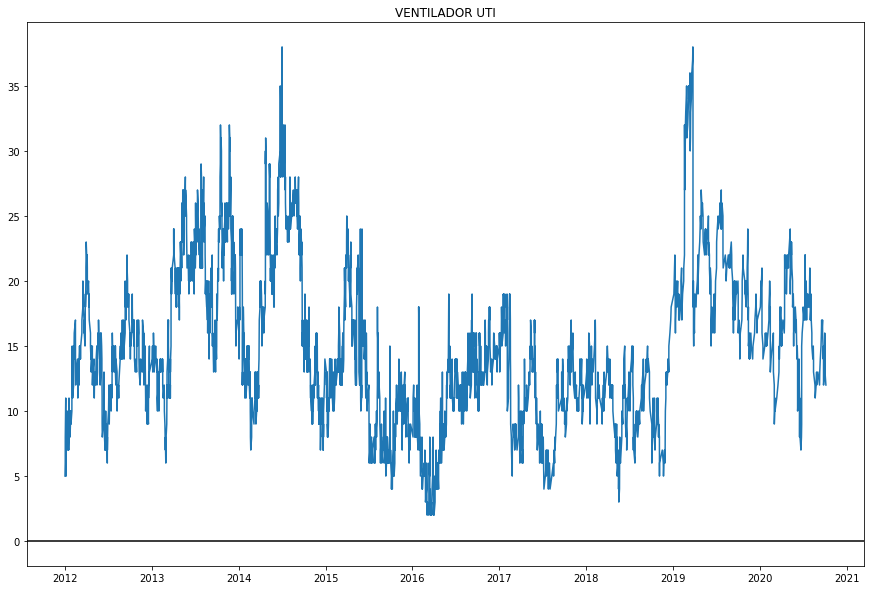

In [68]:
plt.figure(figsize=[15,10])
start_date = '2012'
end_date = '2021'
after_start_date = break_data.index.get_level_values(0) >= start_date
before_end_date = break_data.index.get_level_values(0) <= end_date
between_two_dates = after_start_date & before_end_date
plt.plot(break_data.index.get_level_values(0)[between_two_dates], break_data['Taxa de Quebra'][between_two_dates],'-')
plt.axhline(0,color='k')
plt.title('VENTILADOR UTI')
# plt.legend()

In [69]:
# plt.figure(figsize=[15,10])
# colors = ['red','blue','green']
# start_date = '2013'
# end_date = '2020-03-04'
# for b,m,c in zip(break_data,double_whole_data['Classe'].unique(),colors):
#     after_start_date = b.index.get_level_values(0) >= start_date
#     before_end_date = b.index.get_level_values(0) <= end_date
#     between_two_dates = after_start_date & before_end_date
#     plt.plot(b.index.get_level_values(0)[between_two_dates], b['Taxa de Quebra'][between_two_dates],'-',color=c,label=m)
# plt.axhline(0,color='k')
# plt.title('VENTILADOR UTI')
# plt.legend()

Pular essa parte

In [70]:
# break_data[break_data['Patrimônio']=='15/26375']

#### Correlacionar quando OS resulta em desativação e retirar essa OS do dataframe breakdata

Pega numeros de patrimonio de equipamentos que possuem uma data de desativação

In [305]:
# patr_equip_desativado = equip_amount_data[pd.notna(equip_amount_data['Data Desativação'])].index.get_level_values(1).tolist()



In [306]:
# patr_equip_desativado

Identifica quais OS estão relacionadas a equipamentos que foram desativados

In [307]:
# break_data[break_data['Patrimônio']==patr_equip_desativado[3]]

Obs: 
     - oximetro patrimon 15/26372 desativado antes de 2012 (09/2011), portanto não aparecem OS de manutenção corretiva de 2012-on
     - oximetro patrimon 15/26720 com unica OS após 2012-on sendo esta a de desativação
     - oximetro patrimon 15/26712 com duas OS, a primeira de manutenção, a segunda de desativação

In [308]:
# for patr in patr_equip_desativado:
#     #pega o índice de break_data correspondente à última OS relacionada a um determinado equipamento desativado 
#     #   (identificado pelo seu número de patrimônio)
#         index_to_drop = break_data.index[break_data['Patrimônio']==patr][-1:].tolist() 
#         print(patr,index_to_drop)
#     #dropa esse registro de break_data (pois este equipamento não foi reparado, mas sim desativado nesta ocasião)
#         break_data.drop(index_to_drop,inplace=True)

In [309]:
# break_data

# Calcula Ventiladores Disponíveis

Pega colunas de flags (quando adquire/conserta um equipamento ela contém '1', quando desativa/quebra, ela contém -1)

In [71]:
dates1 = equip_amount_data.index.get_level_values(0)
amounts = equip_amount_data['Ativo'].astype(int)
amounts[amounts==0] = -1
dates2 = break_data.index.get_level_values(0)
breaks = break_data['Processada'].astype(int)
breaks[breaks==0] = -1

concatena aquisições com quebras

In [72]:
available_equips = pd.concat([amounts,breaks])


Retira segundo índice e organiza por data

In [73]:
available_equips = available_equips.reset_index(level=[1])
available_equips = available_equips.drop(['Patrimônio'],axis=1)
available_equips.sort_index(inplace=True)
# available_equips = available_equips.rename(columns={'0':'Quantidade Disponível'})


Adiciona nova coluna com quantidade disponível de equipamentos (ativos e funcionando)

In [74]:
available_equips.loc[:,'Quantidade Disponível'] = available_equips.cumsum()[0]

In [75]:
available_equips

,0,Quantidade Disponível
Data,,
1989-12-26 00:00:00.000,1,1
1990-11-22 00:00:00.000,1,2
1990-11-22 00:00:00.000,1,3
1990-11-22 00:00:00.000,1,4
1990-11-22 00:00:00.000,1,5
...,...,...
2020-09-30 08:52:43.499,-1,162
2020-10-01 13:51:52.101,1,163
2020-10-01 13:52:20.912,1,164


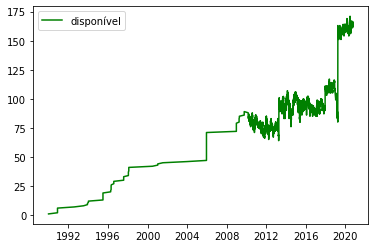

In [76]:
plt.plot(available_equips.index, available_equips['Quantidade Disponível'],color='green',label='disponível')
plt.legend()

In [87]:
available_equips_ts = available_equips.loc[:,'Quantidade Disponível']

<AxesSubplot:xlabel='Data'>

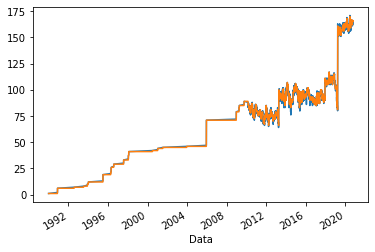

In [117]:
available_equips_ts.plot()
available_equips_ts.groupby(pd.Grouper(freq="W")).last().fillna(method='ffill').plot()

In [89]:
type(available_equips_ts)

pandas.core.series.Series

<AxesSubplot:xlabel='Data'>

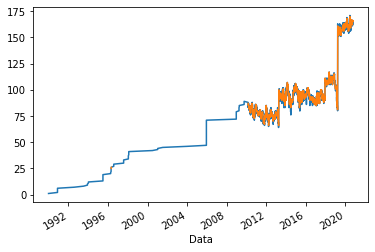

In [107]:
available_equips_ts.plot()
available_equips_ts.groupby(pd.Grouper(freq="W")).last().plot()


Plota total de ventiladores ativos (azul) e quantidade funcionando (verde)

In [118]:
equip_amount_data

Ativo Baixado       Classe  Custo Peça (R$)  \
Data       Patrimônio                                                
1989-12-26 15/21490     True     NÃO  Equipamento          2389.22   
1990-11-22 15/22405     True     NÃO  Equipamento          2448.80   
           15/22406     True     NÃO  Equipamento          2548.22   
           15/22407     True     NÃO  Equipamento          1721.74   
           15/22408     True     NÃO  Equipamento          1399.86   
...                      ...     ...          ...              ...   
2019-03-29 759071       True     NÃO  Equipamento              NaN   
           759072       True     NÃO  Equipamento              NaN   
           759073       True     NÃO  Equipamento              NaN   
           759074       True     NÃO  Equipamento              NaN   
           759075       True     NÃO  Equipamento              NaN   

                       Custo Serviço Externo (R$)        Data Desativação  \
Data       Patrimônio                                                       
1989-12-26 15/21490                           NaN 2019-02-19 16:18:07.008   
1990-11-22 15/22405                       6707.94                     NaT   
           15/22406                       5071.70                     NaT   
           15/22407                        738.75                     NaT   
           15/22408                       6642.74                     NaT   
...                                           ...                     ...   
2019-03-29 759071                             NaN                     NaT   
           759072                             NaN                     NaT   
           759073                             NaN                     NaT   
           759074                             NaN                     NaT   
           759075                             NaN                     NaT   

                      Desativado        Marca  N.º Peças Utilizadas  \
Data       Patrimônio                                                 
1989-12-26 15/21490          SIM      NEWPORT                  28.0   
1990-11-22 15/22405          NÃO      NEWPORT                  14.0   
           15/22406          SIM      NEWPORT                  21.0   
           15/22407          SIM      NEWPORT                  11.0   
           15/22408          NÃO      NEWPORT                  20.0   
...                          ...          ...                   ...   
2019-03-29 759071            NÃO  AIR LIQUIDE                   NaN   
           759072            NÃO  AIR LIQUIDE                   NaN   
           759073            NÃO  AIR LIQUIDE                   NaN   
           759074            NÃO  AIR LIQUIDE                   NaN   
           759075            NÃO  AIR LIQUIDE                   NaN   

                       N.º Quebras  N.º Serviço Externo   N.º Série  NEC  \
Data       Patrimônio                                                      
1989-12-26 15/21490           24.0                  NaN   8806IN129  CEB   
1990-11-22 15/22405           18.0                  3.0   9003IN083  CEB   
           15/22406           19.0                  2.0   9003IN084  CEB   
           15/22407           19.0                  1.0   9003IN085  CEB   
           15/22408           21.0                  2.0   9006IN166  CEB   
...                            ...                  ...         ...  ...   
2019-03-29 759071              NaN                  NaN  MT75-06863  CEB   
           759072              NaN                  NaN  MT75-06685  CEB   
           759073              NaN                  NaN  MT75-06726  CEB   
           759074              1.0                  1.0  MT75-06789  CEB   
           759075              2.0                  2.0  MT75-06784  CEB   

                                                               Orgão  \
Data       Patrimônio                                                  
1989-12-26 15/21490            DIVISAO DE AMB. E PROC

Adiciona primeiro e último pontos com mesmo valor para fechar plot

In [119]:
plt.rcParams.update({'font.size': 22})

In [120]:
# plt.figure(figsize=[15,10],dpi=300)
start_date = '2011'
end_date = '2021'
# masks for interval
after_start_date = equip_amount_data.index.get_level_values(0) >= start_date
before_end_date = equip_amount_data.index.get_level_values(0) <= end_date
between_two_datesA = after_start_date & before_end_date

after_start_date = available_equips.index >= start_date
before_end_date = available_equips.index <= end_date
between_two_datesB = after_start_date & before_end_date

x_data1 = equip_amount_data[between_two_datesA].index.get_level_values(0).values
y_data1 = equip_amount_data['Quantidade de Equipamentos'][between_two_datesA].values.astype(int)

x_data2 = available_equips.index[between_two_datesB].values
y_data2 = available_equips['Quantidade Disponível'][between_two_datesB].values.astype(int)

if x_data1[0] > x_data2[0]:
    x_data1 = np.insert(x_data1,0,x_data2[0])
    y_data1 = np.insert(y_data1,0,y_data1[0])
if x_data1[-1] < x_data2[-1]:
    x_data1 = np.append(x_data1,x_data2[-1])
    y_data1 = np.append(y_data1,y_data1[-1])

In [85]:
# plt.fill_between(array, array2,label='total ativo')
# plt.plot_date(equip_amount_data2.index.get_level_values(0)[between_two_dates], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates],label='total ativo')
plt.step(equip_amount_data_to_plot.index.get_level_values(0), equip_amount_data_to_plot['Quantidade de Equipamentos'],label='total',lw=4)
# plt.bar(equip_amount_data2.index.get_level_values(0)[between_two_dates][:-1], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates][:-1],bar_widths,align='edge',label='total ativo')


# plt.fill_between(available_equips.index[between_two_dates], available_equips['Quantidade Disponível'][between_two_dates],0,color='green',label='disponível')
# plt.plot(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],'sg',label='disponível')
plt.step(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],label='disponível',lw=4)
# plt.bar(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],6,align='edge',label='disponível')
plt.ylim([20,1.1*np.amax(equip_amount_data['Quantidade de Equipamentos'][between_two_datesA])])
plt.title('SENSOR OXIMETRO PULSO')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.legend(loc=3)

NameError: name 'equip_amount_data_to_plot' is not defined

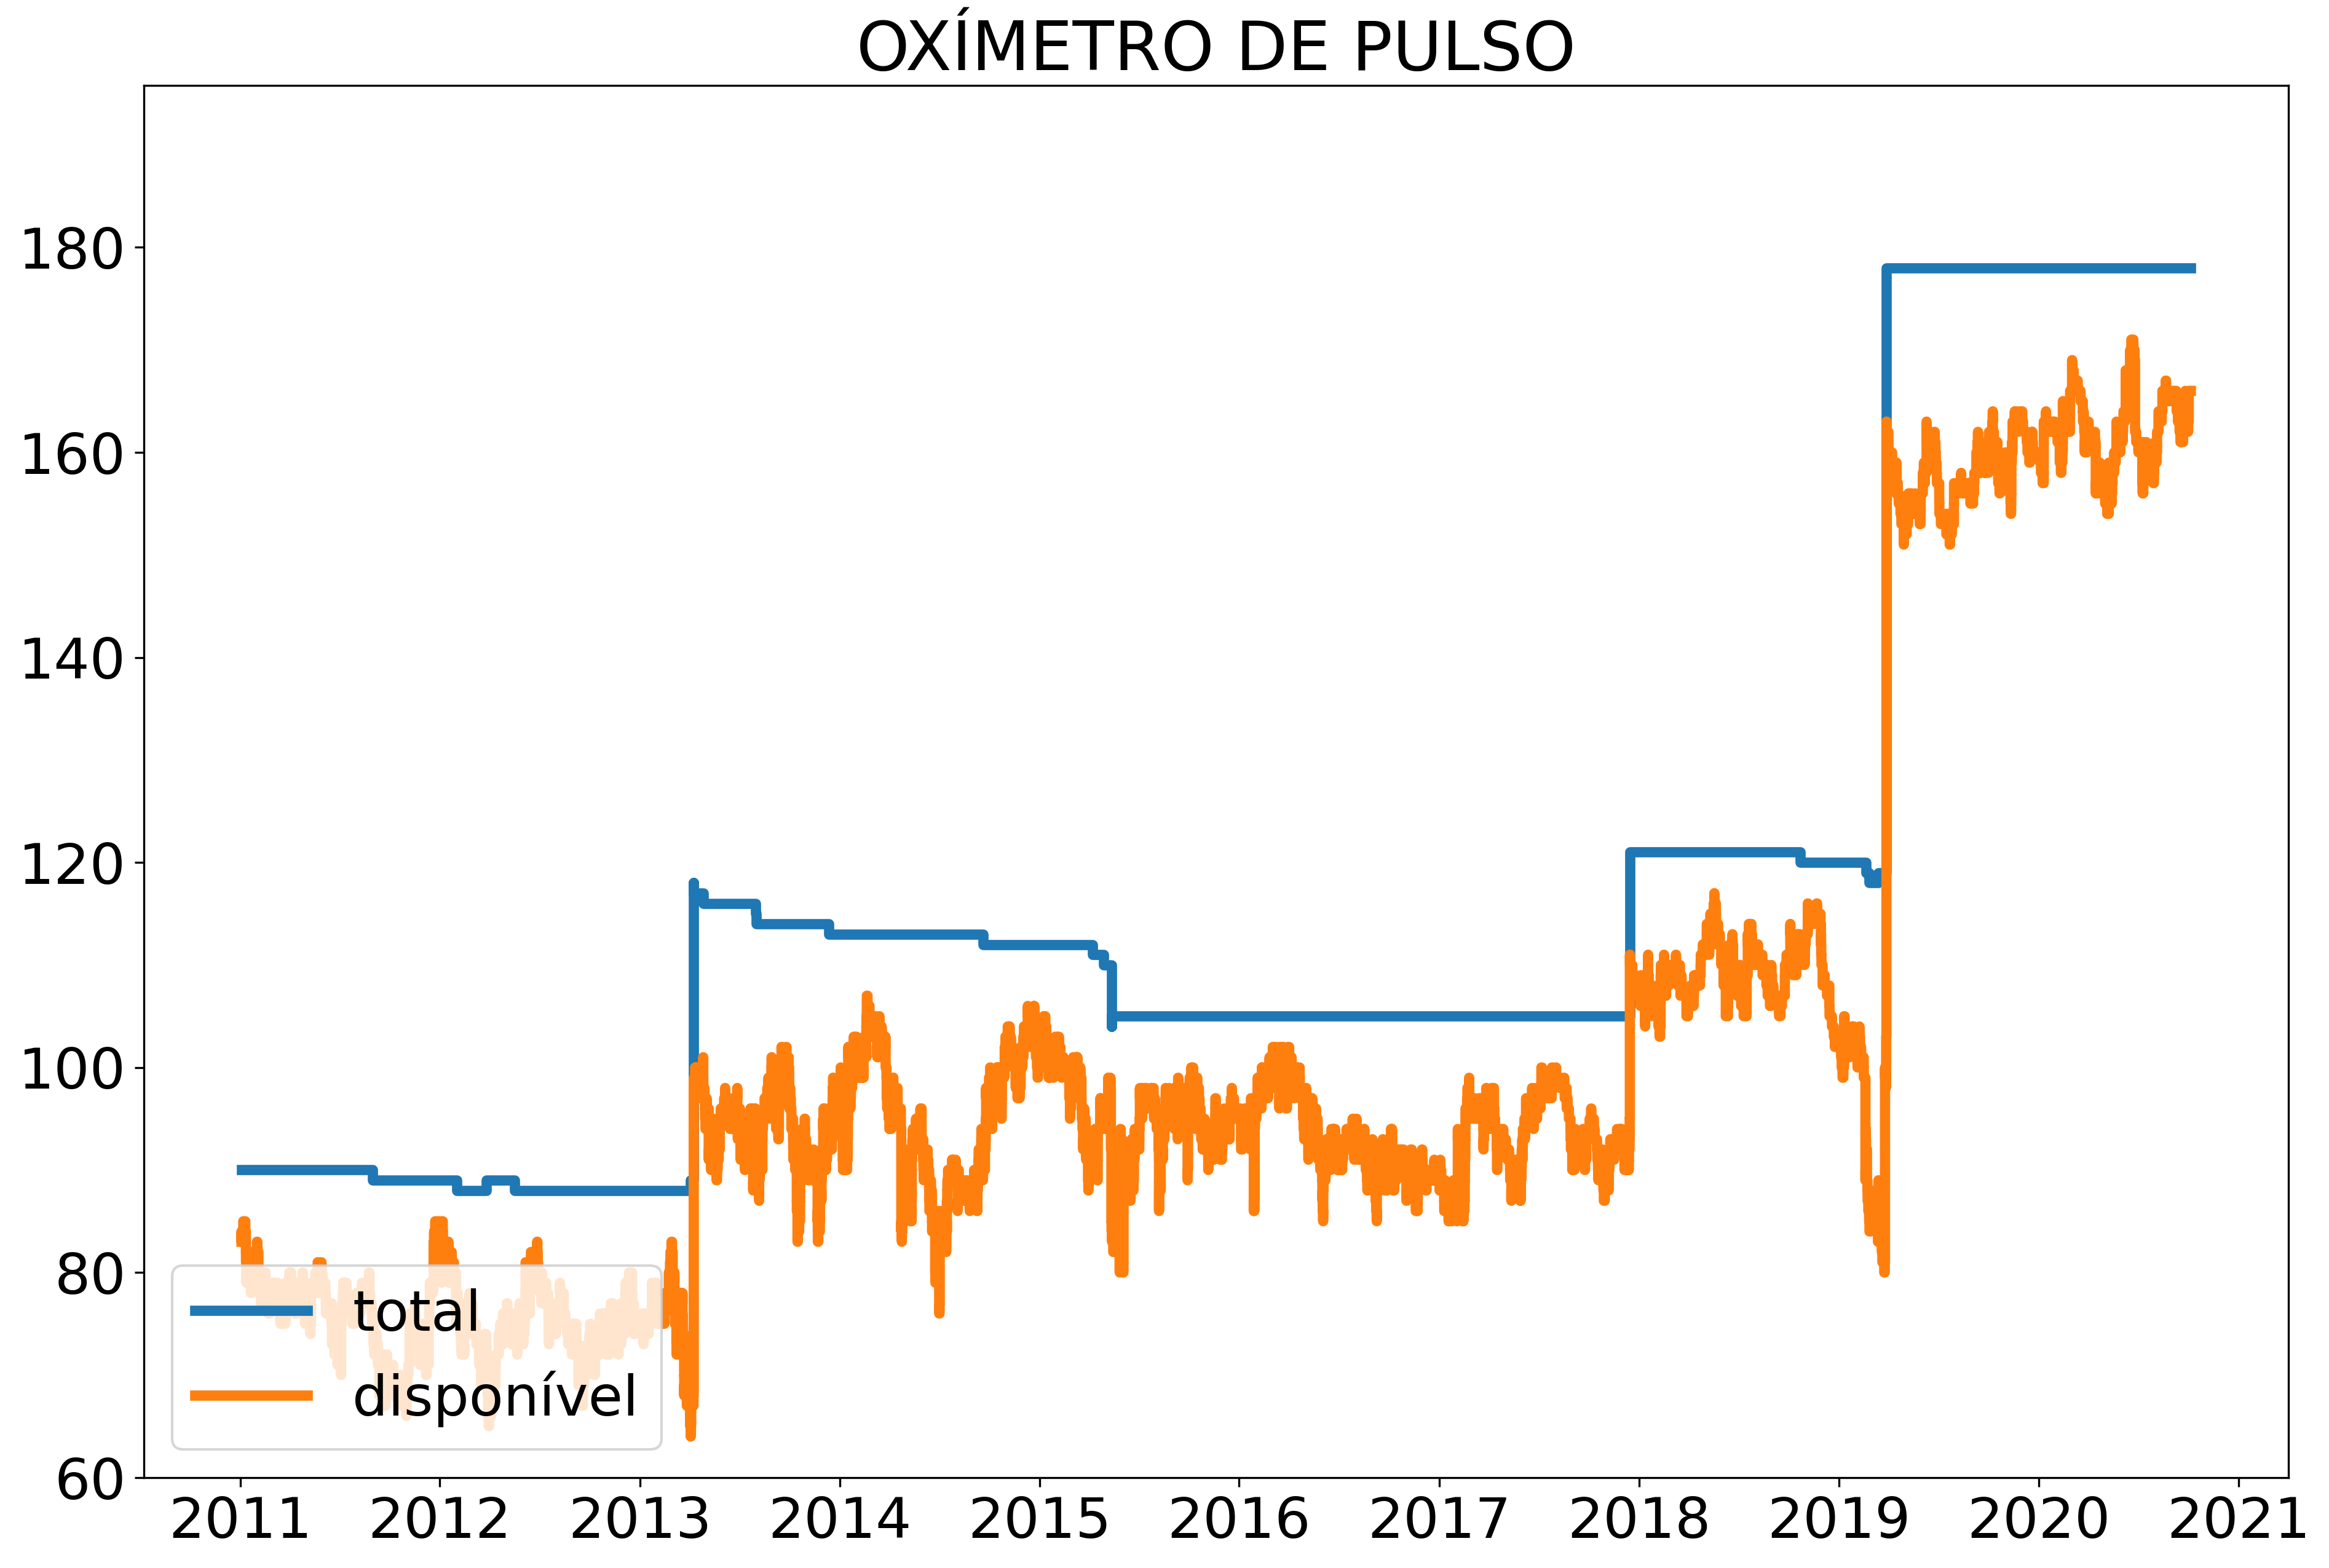

In [121]:
plt.figure(figsize=[15,10],dpi=300)
start_date = '2011'
end_date = '2021'
# masks for interval
after_start_date = equip_amount_data.index.get_level_values(0) >= start_date
before_end_date = equip_amount_data.index.get_level_values(0) <= end_date
between_two_datesA = after_start_date & before_end_date

after_start_date = available_equips.index >= start_date
before_end_date = available_equips.index <= end_date
between_two_datesB = after_start_date & before_end_date

# adds first and last point to plot steps
last_date = available_equips[between_two_datesB].index[-1]
last_pat = equip_amount_data[between_two_datesA].index.get_level_values(1)[-1]

last_data = pd.DataFrame(equip_amount_data[between_two_datesA][-1:].values, columns=equip_amount_data.columns)
last_data.insert(0,'Data',last_date, True)
last_data.insert(0,'Patrimônio',last_pat, True)
last_data = last_data.set_index(['Data','Patrimônio'])

first_date = available_equips[between_two_datesB].index[0]
first_pat = equip_amount_data[between_two_datesA].index.get_level_values(1)[0]

first_data = pd.DataFrame(equip_amount_data[between_two_datesA][:1].values, columns=equip_amount_data.columns)
first_data.insert(0,'Data',first_date, True)
first_data.insert(0,'Patrimônio',first_pat, True)
first_data = first_data.set_index(['Data','Patrimônio'])

equip_amount_data_to_plot = pd.concat([first_data,equip_amount_data[between_two_datesA],last_data])



# plt.fill_between(array, array2,label='total ativo')
# plt.plot_date(equip_amount_data2.index.get_level_values(0)[between_two_dates], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates],label='total ativo')
plt.step(equip_amount_data_to_plot.index.get_level_values(0), equip_amount_data_to_plot['Quantidade de Equipamentos'],label='total',lw=4)
# plt.bar(equip_amount_data2.index.get_level_values(0)[between_two_dates][:-1], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates][:-1],bar_widths,align='edge',label='total ativo')


# plt.fill_between(available_equips.index[between_two_dates], available_equips['Quantidade Disponível'][between_two_dates],0,color='green',label='disponível')
# plt.plot(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],'sg',label='disponível')
plt.step(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],label='disponível',lw=4)
# plt.bar(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],6,align='edge',label='disponível')
plt.ylim([60,1.1*np.amax(equip_amount_data['Quantidade de Equipamentos'][between_two_datesA])])
plt.title('OXÍMETRO DE PULSO')
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.legend(loc=3)

In [122]:
# plt.figure(figsize=[15,10])
# start_date = '1980'
# end_date = '2021'


# after_start_date = equip_amount_data2.index.get_level_values(0) >= start_date
# before_end_date = equip_amount_data2.index.get_level_values(0) <= end_date
# between_two_dates = after_start_date & before_end_date
# # plt.fill_between(array, array2,label='total ativo')
# # plt.plot_date(equip_amount_data2.index.get_level_values(0)[between_two_dates], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates],label='total ativo')
# plt.step(equip_amount_data2.index.get_level_values(0)[between_two_dates], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates],label='total')
# # plt.bar(equip_amount_data2.index.get_level_values(0)[between_two_dates][:-1], equip_amount_data2['Quantidade de Equipamentos'][between_two_dates][:-1],bar_widths,align='edge',label='total ativo')

# after_start_dateB = available_equips.index >= start_date
# before_end_dateB = available_equips.index <= end_date
# between_two_datesB = after_start_dateB & before_end_dateB
# # plt.fill_between(available_equips.index[between_two_dates], available_equips['Quantidade Disponível'][between_two_dates],0,color='green',label='disponível')
# # plt.plot(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],'sg',label='disponível')
# plt.step(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],label='disponível')
# # plt.bar(available_equips.index[between_two_datesB], available_equips['Quantidade Disponível'][between_two_datesB],6,align='edge',label='disponível')
# plt.ylim([0,1.1*np.amax(equip_amount_data2['Quantidade de Equipamentos'][between_two_dates])])
# plt.title('VENTILADOR UTI')
# plt.legend(loc=3)

OBS2:  
    1. gráfico não mostra quebras de OS que não foram encerradas, por isso não há incoerência antes de 2012 
    (ex: um equipamento quebrou em 2011 e foi consertado em 2012 não causa um aumento na curva laranja porque ele não
          está incluído na tabela de OS (2012-on), portanto uma OS como essa não aparece)
    2. o lado ruim disso é que não mostra atualmente equipamentos quebrados com OS abertas que não foram encerradas

# Custo de Material

Obs: incluidos apenas OS encerradas (OS abertas mas não processadas contém valor de custo?)

In [123]:
mat_util = pd.read_excel('./MaterialUtilizado/MaterialUtilizadoPeriodo2011_2021.xls',skiprows=3,header=2)
mat_util['Data Saida'] = pd.to_datetime(mat_util['Data Saida'],dayfirst=True)
mat_util.sort_values(by=['Data Saida'], inplace=True) 

In [124]:
mat_util.set_index(['Data Saida'],inplace=True)

In [125]:
selected_equip = mat_util['Tipo Equipamento']=='VENTILADOR UTI'

In [126]:
custo = mat_util[selected_equip]['Custo']

In [127]:
custo

Data Saida
2010-04-09     561.00
2010-04-14     111.00
2010-04-14     246.40
2010-04-20     525.00
2010-04-22      74.00
               ...   
2020-10-01    2905.10
2020-10-01     416.71
2020-10-01     416.71
2020-10-01     416.71
2020-10-02     168.78
Name: Custo, Length: 1654, dtype: float64

In [128]:
custo = custo.sort_index()

In [129]:
custo_por_mes = custo.groupby(pd.Grouper(freq="M"))  # DataFrameGroupBy (grouped by Month)

In [173]:
custo_por_mes_sum = custo_por_mes.sum()

#### Importa dados IPCA

In [170]:
ipca = pd.read_excel('./IPCA/tabela1737.xlsx',skiprows=3,header=0,skipfooter=1).T
new_header = ipca.iloc[0] #grab the first row for the header
ipca = ipca[1:] #take the data less the header row
ipca.columns = new_header #set the header row as the df header
# lista_eqp = lista_eqp.drop(['Localização','Modelo','Fornecedor','Núm. Doc. da Aquisição','Nota Fiscal','Garantia',
#                             'Parecer Desativação','Contrato','Vida Útil','Equipamento Crítico',
# #                                'Descrição Complementar'], axis=1)
# ipca = ipca.drop(['Fonte: IBGE - Índice Nacional de Preços ao Consumidor Amplo'])
# lista_eqp['Aquisição'] = pd.to_datetime(lista_eqp['Aquisição'],dayfirst=True)
# lista_eqp['Data Desativação'] = pd.to_datetime(lista_eqp['Data Desativação'],dayfirst=True)
# lista_eqp.sort_values(by=['Aquisição'], inplace=True)

In [171]:
import dateparser
# ipca.index = ipca.index.apply(lambda x: dateparser.parse(x))
ipca.index = ipca.index.map(dateparser.parse)
# ipca.rename(index={})

In [179]:
ipca = ipca.squeeze()

In [182]:
ipca.index.strftime('%B %Y')

Index(['December 1979', 'January 1980', 'February 1980', 'March 1980',
       'April 1980', 'May 1980', 'June 1980', 'July 1980', 'August 1980',
       'September 1980',
       ...
       'January 2020', 'February 2020', 'March 2020', 'April 2020', 'May 2020',
       'June 2020', 'July 2020', 'August 2020', 'September 2020',
       'October 2020'],
      dtype='object', length=491)

In [181]:
custo_por_mes_sum.index.strftime('%B %Y')

Index(['April 2010', 'May 2010', 'June 2010', 'July 2010', 'August 2010',
       'September 2010', 'October 2010', 'November 2010', 'December 2010',
       'January 2011',
       ...
       'January 2020', 'February 2020', 'March 2020', 'April 2020', 'May 2020',
       'June 2020', 'July 2020', 'August 2020', 'September 2020',
       'October 2020'],
      dtype='object', name='Data Saida', length=127)

In [189]:
custo_por_mes_sum

Data Saida
2010-04-30     2139.65
2010-05-31      937.94
2010-06-30     2736.03
2010-07-31     3064.88
2010-08-31     2309.09
                ...   
2020-06-30     1585.37
2020-07-31    37839.19
2020-08-31    31669.93
2020-09-30    29750.74
2020-10-31    13240.29
Freq: M, Name: Custo, Length: 127, dtype: float64

In [191]:
for idx in custo_por_mes_sum.index.strftime('%B %Y'):
    print(ipca.index.strftime('%B %Y').get_loc(idx))
    custo_por_mes_sum[idx] *= ipca[-1]/ipca[ipca.index.strftime('%B %Y').get_loc(idx)]

364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490


In [192]:
custo_por_mes_sum

Data Saida
2010-04-30     3756.569486
2010-05-31     1639.683893
2010-06-30     4783.061093
2010-07-31     5357.414772
2010-08-31     4034.684593
                  ...     
2020-06-30     1618.908471
2020-07-31    38501.085374
2020-08-31    32146.741129
2020-09-30    30006.601606
2020-10-31    13240.290000
Freq: M, Name: Custo, Length: 127, dtype: float64

In [193]:
ipca['April 2010']

2010-04-09    3097.42
Name: Brasil, dtype: object

In [194]:
ipca[-1]

5438.12

In [185]:
# ipca.index.strftime('%B %Y').get_loc(custo_por_mes_sum.index.strftime('%B %Y')[0])

364

In [225]:
equip_amount_data_to_plot[:3]

Ativo Baixado       Classe Custo Peça (R$)  \
Data                Patrimônio                                               
2011-01-20 09:30:46 15/37629    False     SIM  Equipamento             NaN   
                    15/37629    False     SIM  Equipamento             NaN   
2011-03-15 00:00:00 15/41789     True     NÃO  Equipamento               0   

                               Custo Serviço Externo (R$) Data Desativação  \
Data                Patrimônio                                               
2011-01-20 09:30:46 15/37629                          NaN              NaT   
                    15/37629                          NaN              NaT   
2011-03-15 00:00:00 15/41789                          NaN              NaT   

                               Desativado   Marca N.º Peças Utilizadas  \
Data                Patrimônio                                           
2011-01-20 09:30:46 15/37629          SIM     BCI                  NaN   
                    15/37629          SIM     BCI                  NaN   
2011-03-15 00:00:00 15/41789          SIM  DIXTAL                    0   

                               N.º Quebras N.º Serviço Externo  N.º Série  \
Data                Patrimônio                                              
2011-01-20 09:30:46 15/37629             1                 NaN   90301919   
                    15/37629             1                 NaN   90301919   
2011-03-15 00:00:00 15/41789             2                 NaN  110606822   

                                NEC                              Orgão  \
Data                Patrimônio                                           
2011-01-20 09:30:46 15/37629    CEB  PNEUMOLOGIA/ UNIDADE RESPIRATORIA   
                    15/37629    CEB  PNEUMOLOGIA/ UNIDADE RESPIRATORIA   
2011-03-15 00:00:00 15/41789    CEB  PNEUMOLOGIA/ UNIDADE RESPIRATORIA   

                               Permitir O.S. Tipo Equipamento U.S. Valor (R$)  \
Data                Patrimônio                                                  
2011-01-20 09:30:46 15/37629             NÃO   OXIMETRO PULSO   HC       1600   
                    15/37629             NÃO   OXIMETRO PULSO   HC       1600   
2011-03-15 00:00:00 15/41789             SIM   OXIMETRO PULSO   HC       4000   

                               Quantidade de Equipamentos  
Data                Patrimônio                             
2011-01-20 09:30:46 15/37629                           94  
                    15/37629                           94  
2011-03-15 00:00:00 15/41789                           95

Text(0.5, 1.0, 'MONITOR FISIOLOGICO MULTIUSO')

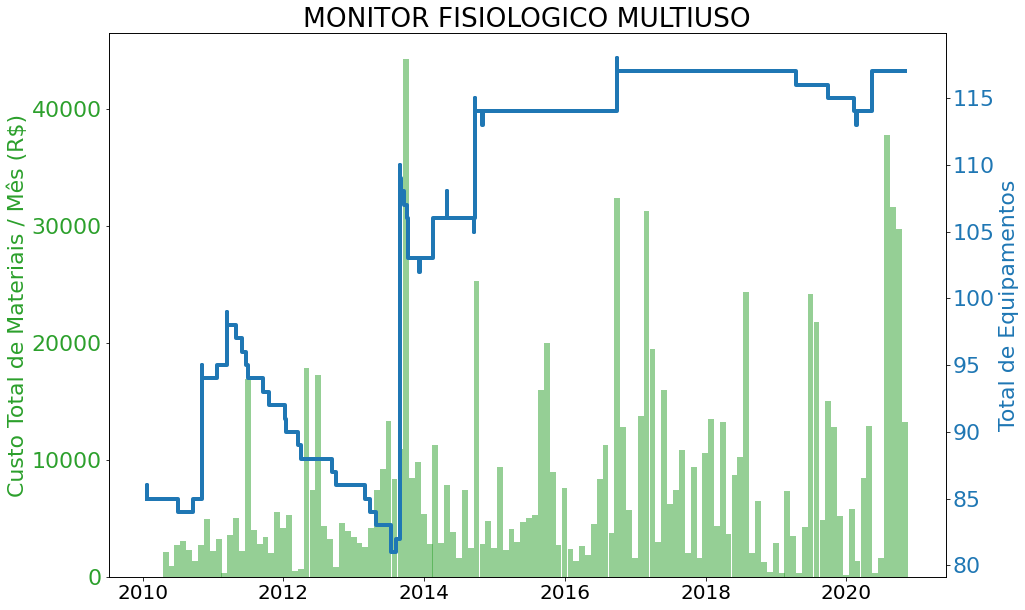

In [226]:
start_date = '2010'
end_date = '2021'
# masks for interval
after_start_date = equip_amount_data.index.get_level_values(0) >= start_date
before_end_date = equip_amount_data.index.get_level_values(0) <= end_date
between_two_datesA = after_start_date & before_end_date

after_start_date = custo_por_mes.sum().index >= start_date
before_end_date = custo_por_mes.sum().index <= end_date
between_two_datesB = after_start_date & before_end_date

# adds first and last point to plot steps
last_date = max(custo_por_mes.sum()[between_two_datesB].index[-1],equip_amount_data[between_two_datesA].index.get_level_values(0)[-1])
last_pat = equip_amount_data[between_two_datesA].index.get_level_values(1)[-1]

last_data = pd.DataFrame(equip_amount_data[between_two_datesA][-1:].values, columns=equip_amount_data.columns)
last_data.insert(0,'Data',last_date, True)
last_data.insert(0,'Patrimônio',last_pat, True)
last_data = last_data.set_index(['Data','Patrimônio'])

first_date = min(custo_por_mes.sum()[between_two_datesB].index[0],equip_amount_data[between_two_datesA].index.get_level_values(0)[0])
first_pat = equip_amount_data[between_two_datesA].index.get_level_values(1)[0]

first_data = pd.DataFrame(equip_amount_data[between_two_datesA][:1].values, columns=equip_amount_data.columns)
first_data.insert(0,'Data',first_date, True)
first_data.insert(0,'Patrimônio',first_pat, True)
first_data = first_data.set_index(['Data','Patrimônio'])

equip_amount_data_to_plot = pd.concat([first_data,equip_amount_data[between_two_datesA],last_data])
#PLOT
fig, ax1 = plt.subplots(figsize=[15,10])
color = 'tab:green'
ax1.bar(custo_por_mes.sum().index,custo_por_mes.sum().values,width=pd.Timedelta(30, unit='days'),label='OXIMETRO PULSO',color=color,alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Custo Total de Materiais / Mês (R$)',color=color)



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.step(equip_amount_data_to_plot.index.get_level_values(0), equip_amount_data_to_plot['Quantidade de Equipamentos'],label='total',lw=4)
ax2.set_ylabel('Total de Equipamentos', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.title('MONITOR FISIOLOGICO MULTIUSO')

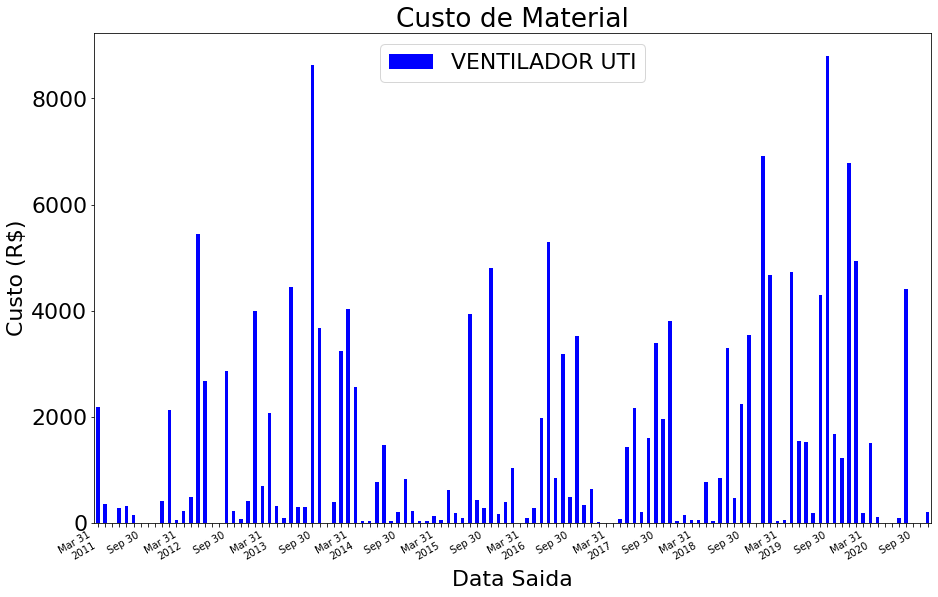

In [83]:
ax = custo_por_mes.sum().plot(figsize=[15,10],label='VENTILADOR UTI',legend=True,title='Custo de Material',kind='bar',color='b')
xtick = pd.date_range( start=custo.index.min( ), end=custo.index.max( ), freq='Y' )
import matplotlib.ticker as ticker
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(custo_por_mes.sum().index)
# Every 6th ticklable shows the month and day
ticklabels[::6] = [item.strftime('%b %d') for item in custo_por_mes.sum().index[::6]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in custo_por_mes.sum().index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
ax.set_ylabel('Custo (R$)')
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels

# Custo de Serviço Externo

In [228]:
conserto_ext = pd.read_excel('ConsertoExternoPeriodo2011_2021.xls',skiprows=3,header=2)
conserto_ext['Data Encerramento'] = pd.to_datetime(conserto_ext['Data Encerramento'],dayfirst=True)
conserto_ext.sort_values(by=['Data Encerramento'], inplace=True)  


In [229]:
conserto_ext.set_index(['Data Encerramento'],inplace=True)

In [231]:
selected_equip = conserto_ext['Tipo']=='VENTILADOR UTI'

In [232]:
custo_ext = conserto_ext[selected_equip]['Custo']
custo_ext = custo_ext.sort_index()

In [233]:
custo_ext_por_mes = custo_ext.groupby(pd.Grouper(freq="M"))  # DataFrameGroupBy (grouped by Month)

In [234]:
custo_ext_por_mes.mean().index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', name='Data Encerramento', length=116, freq='M')

In [235]:
custo_ext_por_mes.mean().index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', name='Data Encerramento', length=116, freq='M')

Text(0.5, 1.0, 'MONITOR FISIOLOGICO MULTIUSO')

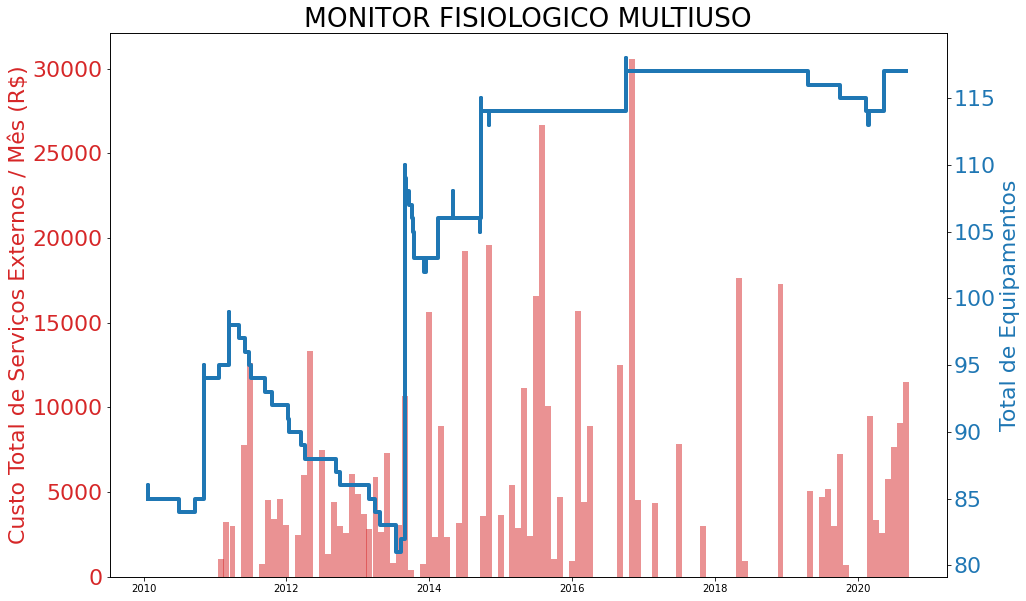

In [236]:
start_date = '2010'
end_date = '2021'
# masks for interval
after_start_date = equip_amount_data.index.get_level_values(0) >= start_date
before_end_date = equip_amount_data.index.get_level_values(0) <= end_date
between_two_datesA = after_start_date & before_end_date

after_start_date = custo_ext_por_mes.sum().index >= start_date
before_end_date = custo_ext_por_mes.sum().index <= end_date
between_two_datesB = after_start_date & before_end_date

# adds first and last point to plot steps
last_date = max(custo_ext_por_mes.sum()[between_two_datesB].index[-1],equip_amount_data[between_two_datesA].index.get_level_values(0)[-1])
last_pat = equip_amount_data[between_two_datesA].index.get_level_values(1)[-1]

last_data = pd.DataFrame(equip_amount_data[between_two_datesA][-1:].values, columns=equip_amount_data.columns)
last_data.insert(0,'Data',last_date, True)
last_data.insert(0,'Patrimônio',last_pat, True)
last_data = last_data.set_index(['Data','Patrimônio'])

first_date = min(custo_ext_por_mes.sum()[between_two_datesB].index[0],equip_amount_data[between_two_datesA].index.get_level_values(0)[0])
first_pat = equip_amount_data[between_two_datesA].index.get_level_values(1)[0]

first_data = pd.DataFrame(equip_amount_data[between_two_datesA][:1].values, columns=equip_amount_data.columns)
first_data.insert(0,'Data',first_date, True)
first_data.insert(0,'Patrimônio',first_pat, True)
first_data = first_data.set_index(['Data','Patrimônio'])

equip_amount_data_to_plot = pd.concat([first_data,equip_amount_data[between_two_datesA],last_data])
#PLOT
fig, ax1 = plt.subplots(figsize=[15,10])
color = 'tab:red'
ax1.bar(custo_ext_por_mes.sum().index,custo_ext_por_mes.sum().values,width=pd.Timedelta(30, unit='days'),label='OXIMETRO PULSO',color=color,alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Custo Total de Serviços Externos / Mês (R$)',color=color)



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.step(equip_amount_data_to_plot.index.get_level_values(0), equip_amount_data_to_plot['Quantidade de Equipamentos'],label='total',lw=4)
ax2.set_ylabel('Total de Equipamentos', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.title('MONITOR FISIOLOGICO MULTIUSO')

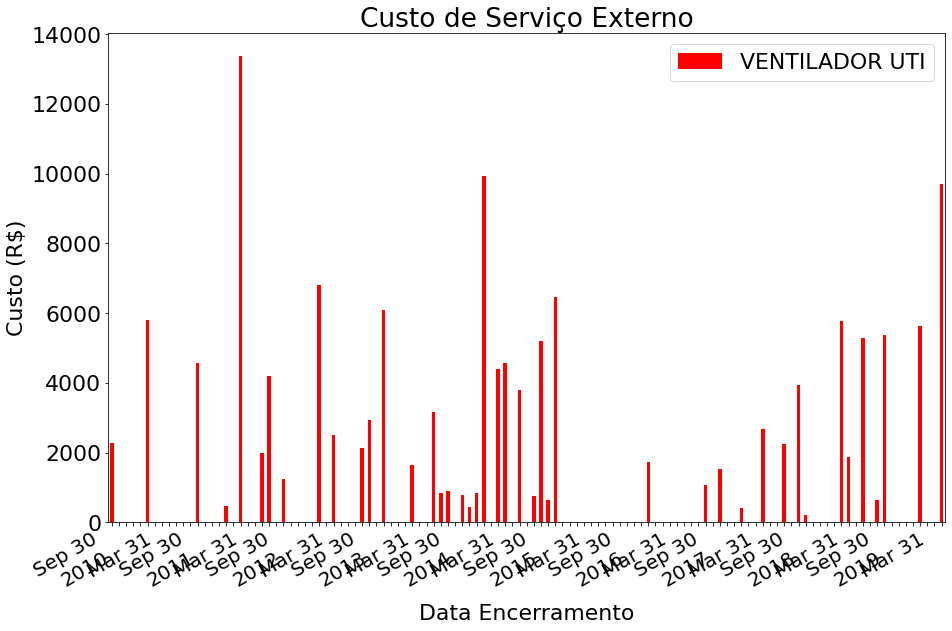

In [92]:
ax = custo_ext_por_mes.sum().plot(figsize=[15,10],label='VENTILADOR UTI',legend=True,title='Custo de Serviço Externo',kind='bar',color='r')
import matplotlib.ticker as ticker
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(custo_ext_por_mes.sum().index)
# Every 6th ticklable shows the month and day
ticklabels[::6] = [item.strftime('%b %d') for item in custo_ext_por_mes.sum().index[::6]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in custo_ext_por_mes.sum().index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()


ax.grid(which='minor', axis='x', linestyle='--')
ax.set_ylabel('Custo (R$)')
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels

In [366]:
i=0
while x_data3[i] < x_data2[i]:
    print('i=',i)
    x_data2 = np.insert(x_data2,i,x_data3[i])
    y_data2 = np.insert(y_data2,0,0)
    i+=1
    
i=0
while x_data2[i] < x_data3[i]:
    print(x_data3[i])
    print('j=',i)
    x_data3 = np.insert(x_data3,i,x_data2[i])
    y_data3 = np.insert(y_data3,0,0)
    i+=1

2011-01-31 00:00:00
j= 0
2011-01-31 00:00:00
j= 1
2011-01-31 00:00:00
j= 2
2011-01-31 00:00:00
j= 3
2011-01-31 00:00:00
j= 4
2011-01-31 00:00:00
j= 5
2011-01-31 00:00:00
j= 6
2011-01-31 00:00:00
j= 7
2011-01-31 00:00:00
j= 8


In [371]:
if len(x_data2)>len(x_data3):
    y_data3 = np.append(y_data3,np.zeros(len(x_data2)-len(x_data3)))
    x_data3 = np.append(x_data3,x_data2[len(x_data3):])
    x_data3 = pd.to_datetime(x_data3)
elif len(x_data2)<len(x_data3):
    y_data2 = np.append(y_data2,np.zeros(len(x_data3)-len(x_data2)))
    x_data2 = np.append(x_data2,x_data3[len(x_data2):])
    x_data2 = pd.to_datetime(x_data2)
    

In [365]:
x_data2 = custo_por_mes.sum().index
x_data3 = custo_ext_por_mes.sum().index

y_data3 = custo_ext_por_mes.sum().values
y_data2 = custo_por_mes.sum().values

In [372]:
len(x_data2)

127

In [373]:
x_data2

DatetimeIndex(['2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31',
               '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30',
               '2010-12-31', '2011-01-31',
               ...
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Data Saida', length=127, freq='M')

In [374]:
y_data2

array([ 2139.65,   937.94,  2736.03,  3064.88,  2309.09,  1354.31,
        2702.39,  4965.29,  2180.83,  3196.97,   337.42,  3544.2 ,
        4998.4 ,  2207.81, 16905.11,  3975.3 ,  2836.23,  3441.04,
        2055.11,  5562.06,  4154.67,  5248.71,   521.96,   641.93,
       17829.48,  7455.39, 17279.42,  4338.57,  3274.49,   838.33,
        4645.97,  3942.09,  3427.67,  2865.06,  2538.4 ,  4184.81,
        7408.6 ,  9204.82, 13331.76,  8390.52, 10923.98, 44303.07,
        8441.59,  9789.07,  5375.76,  2838.21, 11311.45,  2883.15,
        7876.46,  3861.17,  1597.69,  7465.68,  2450.98, 25317.84,
        2824.92,  4733.34,  2505.25,  9359.56,  2282.82,  4132.52,
        2962.05,  4675.06,  4994.3 ,  5251.58, 15981.81, 20009.34,
        8964.81,  2727.28,  7581.45,  2411.71,  1393.96,  2608.31,
        1865.92,  4525.31,  8381.53, 11239.63,  3715.42, 32427.17,
       12838.36,  5731.88,  1585.84, 13797.5 , 31297.02, 19472.85,
        2998.47, 15954.21,  6232.37,  7458.21, 10839.39,  2066

In [376]:
y_data3

array([    0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,  1030.34,  3221.2 ,  3019.2 ,
           0.  ,  7798.39, 12606.5 ,     0.  ,   741.  ,  4507.6 ,
        3424.2 ,  4598.  ,  3057.  ,     0.  ,  2467.6 ,  6039.66,
       13333.3 ,     0.  ,  7472.87,  1324.8 ,  4401.42,  2971.02,
        2571.05,  6065.82,  4860.13,  3685.1 ,  2849.8 ,  5886.78,
        2659.8 ,  7300.65,   830.  ,  3053.2 , 10647.35,   400.  ,
           0.  ,   759.57, 15640.75,  2327.  ,  8895.04,  2372.43,
           0.  ,  3183.99, 19228.52,     0.  ,     0.  ,  3586.23,
       19604.88,     0.  ,  3632.4 ,     0.  ,  5401.82,  2885.  ,
       11134.76,  2393.45, 16590.  , 26653.4 , 10086.09,  1063.48,
        4700.81,     0.  ,   932.2 , 15701.4 ,  4392.2 ,  8904.8 ,
           0.  ,     0.  ,     0.  ,     0.  , 12492.22,     0.  ,
       30565.68,  4531.9 ,     0.  ,     0.  ,  4367.2 ,     0.  ,
           0.  ,     0.  ,  7860.  ,     0.  ,     0.  ,     0

In [377]:
x_data3

DatetimeIndex(['2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31',
               '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30',
               '2010-12-31', '2011-01-31',
               ...
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', length=127, freq=None)

# teste interface

In [103]:
# from ipywidgets import AppLayout, Button, Layout, Label, SelectMultiple, DatePicker, Checkbox, VBox, Dropdown, TwoByTwoLayout, Output
import ipywidgets as widgets

In [96]:
from bqplot import pyplot as bqplt
import bqplot as bq

In [98]:
x_dt = bq.DateScale()
y_sc = bq.LinearScale()

x_data1 = equip_amount_data_to_plot.index.get_level_values(0)
y_data1 = equip_amount_data_to_plot['Quantidade de Equipamentos'].values.astype(int)
# y_data2 = 
interp = 'linear'
line1 = bq.Lines(x=x_data1, y=y_data1, scales={'x': x_dt, 'y': y_sc}, display_legend=True, labels=['Total'],interpolation=interp)
line1.fill = 'bottom'
# line1.marker = 'circle'
line1.fill_opacities = [0.2]

x_data2 = available_equips.index[between_two_datesB]
y_data2 = available_equips['Quantidade Disponível'][between_two_datesB].values.astype(int)
line2 = bq.Lines(x=x_data2, y=y_data2, scales={'x': x_dt, 'y': y_sc}, display_legend=True, labels=['Disponível'],interpolation=interp)
line2.fill = 'bottom'
line2.marker = 'circle'
line2.fill_opacities = [0.2]
line2.colors = ['DarkOrange']
line2.marker_size = 8
line2.opacities = [.5]

ax_x = bq.Axis(scale=x_dt, label='Data')
ax_y = bq.Axis(scale=y_sc, orientation='vertical', label='Quantidade de Equipamentos')

fig = bq.Figure(marks=[line1,line2],axes=[ax_x, ax_y])


In [133]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab(titles='a')
tab.children = children
[tab.set_title(i, title) for i, title in enumerate(tab_contents)]
# tab.titles = [str(i) for i in range(len(children))]
tab

In [130]:
tab.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_titles',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'box_style',
 'children',
 'layout',
 'selected_index']

In [250]:
%matplotlib notebook 
title = widgets.Label(value="Interface de Análise Temporal do GETS",
                      layout=widgets.Layout(border= '3px solid red',width='100%', display='flex', align_items='center',
                                           justify_content='center'))
# title.config(font=("Courier", 44))
tab_titles = ['Quantidade','Custo']
tab = widgets.Tab()
[tab.set_title(i, title) for i, title in enumerate(tab_titles)]

label1 = widgets.Label(value="Tipo de Medida:")
label2 = widgets.Label(value="Equipamento(s):")
label3 = widgets.Label(value="Data Inicial:")
label4 = widgets.Label(value="Data Final:")
label5 = widgets.Label(value="Mostrar Tendência?")

analysis_types = ['Quantidade Disponível','Custo Total de Material/Mês', 'Custo Total de Serviço Externo/Mês']
selected_analysis = widgets.Dropdown(
    options=analysis_types,
    value='Quantidade Disponível',
    description='',
    disabled=False,
)

selected_equips = widgets.SelectMultiple(
    options=equip_type,
    value=[equip_type[0]],
    #rows=10,
    description='',
    disabled=False
)
tendency = widgets.Checkbox(
    value=False,
    description='',
    disabled=False,
    indent=False
)
selected_start_date = widgets.DatePicker(
    description='',
    disabled=False
)
selected_end_date = widgets.DatePicker(
    description='',
    disabled=False
)

button_plot = widgets.Button(
    description='Plotar',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Gera o gráfico da medida selecionada'
)
# plot_output = Output(layout={'border': '1px solid black'})

# # @ipywidgets.interact
def on_button_clicked(b):
    line2.colors = ['Red']


button_plot.on_click(on_button_clicked)


vbox = widgets.VBox([label2,
              selected_equips,
              label3,
              selected_start_date,
              label4,
              selected_end_date,
              label5,
              tendency,
              button_plot
             ])

vbox2 = widgets.VBox([label1,
              selected_analysis,
              label2,
              selected_equips,
              label3,
              selected_start_date,
              label4,
              selected_end_date,
              label5,
              tendency,
              button_plot
             ])

app = widgets.AppLayout(header=None,
          left_sidebar=vbox,
          center=fig,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0],
          pane_heights=[0,9,0],
          layout=widgets.Layout(border= '2px solid black'))

app2 = widgets.AppLayout(header=None,
          left_sidebar=vbox2,
          center=fig,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0],
          pane_heights=[0,9,0],
          layout=widgets.Layout(border= '2px solid blue'))

children = [app,app2]
tab.children = children
main_app = widgets.VBox([title,tab])
main_app

In [149]:
app = ipywidgets.AppLayout(header=title,
          left_sidebar=vbox,
          center=plot_output,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0])

In [150]:
app

AppLayout(children=(Label(value='Interface de Análise Temporal do GETS', layout=Layout(grid_area='header')), V…

In [97]:

size = 100
np.random.seed(0)

x_data = range(size)
y_data = np.random.randn(size)
y_data_2 = np.random.randn(size)
y_data_3 = np.cumsum(np.random.randn(size) * 100.)

x_ord = bq.OrdinalScale()
y_sc = bq.LinearScale()

bar = bq.Bars(x=np.arange(10), y=np.random.rand(10), scales={'x': x_ord, 'y': y_sc})
ax_x = bq.Axis(scale=x_ord)
ax_y = bq.Axis(scale=y_sc, tick_format='0.2f', orientation='vertical')

fig = bq.Figure(marks=[bar], axes=[ax_x, ax_y], padding_x=0.025, padding_y=0.025,
                layout=Layout(width='auto', height='90%'))

In [98]:
# from ipywidgets import FloatSlider

# max_slider = FloatSlider(min=0, max=10, default_value=2, description="Max: ",
#                          layout=Layout(width='auto', height='auto'))
# min_slider = FloatSlider(min=-1, max=10, description="Min: ",
#                          layout=Layout(width='auto', height='auto'))
# app = TwoByTwoLayout(top_left=min_slider,
#                      bottom_left=max_slider,
#                      bottom_right=fig,
#                      align_items="center",
#                      height='700px')

# # jslink((y_sc, 'max'), (max_slider, 'value'))
# # jslink((y_sc, 'min'), (min_slider, 'value'))
# # jslink((min_slider, 'max'), (max_slider, 'value'))
# # jslink((max_slider, 'min'), (min_slider, 'value'))

# max_slider.value = 1.5
# app

TwoByTwoLayout(children=(FloatSlider(value=0.0, description='Min: ', layout=Layout(grid_area='top-left', heigh…

In [101]:
app2 = TwoByTwoLayout(top_left=title,
                     bottom_left=button_plot,
                     bottom_right=fig,
                     align_items="center",
                     height='700px')

In [102]:
app2

TwoByTwoLayout(children=(Label(value='Interface de Análise Temporal do GETS', layout=Layout(grid_area='top-lef…

In [100]:
price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.8], [0.8, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'],
                          index=pd.date_range(start='01-01-2007', periods=150))

In [101]:
x_data = price_data.index.values

In [147]:
fig = bqplt.figure()
line = bqplt.plot(x=x_data, y=price_data['Security 1'],interpolation='linear')
fig

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [125]:
security_1 = np.cumsum(np.random.randn(150)) + 100.
fig = bqplt.figure(title='Security 1')
axes_options = {'x': {'label': 'Index'}, 'y': {'label': 'Price'}}
# x values default to range of values when not specified
line = bqplt.plot(security_1, axes_options=axes_options)
fig

Figure(axes=[Axis(label='Index', scale=LinearScale()), Axis(label='Price', orientation='vertical', scale=Linea…

In [127]:
line.colors = ['DarkOrange']


In [131]:
line.interpolation = 'linear'

In [135]:
line.marker = 'circle'

In [136]:
line.opacities = [.5]

In [137]:
line.fill = 'bottom'
line.fill_opacities = [0.2]

# Decomposição

Pega dado de interesse como serie temporal

In [26]:
ts = break_data[0]['Taxa de Quebra']
print(ts[1])

2


In [27]:
type(ts)

pandas.core.series.Series

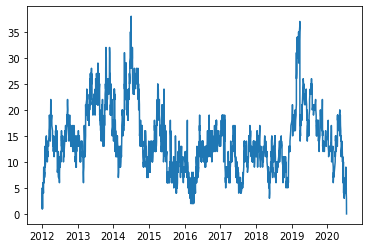

In [28]:
plt.plot(ts.index.get_level_values(0),ts)

É possível dropar o indice 'Num OS'

In [29]:
ts3 = ts.droplevel(1)

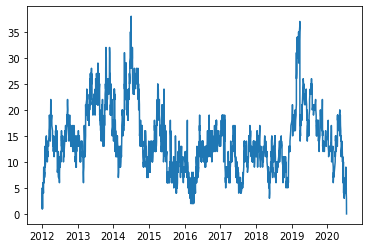

In [30]:
plt.plot(ts3)

É possível pegar um intervalo de tempo

In [31]:
ts2 = ts.loc['2012-01':'2020-02',:]

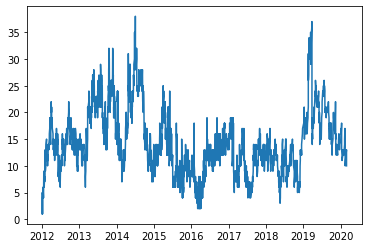

In [32]:
plt.plot(ts2.index.get_level_values(0),ts2)

Decompondo serie em tendencia, sazonalidade e resíduos

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
decomp = seasonal_decompose(ts,period=12)

In [35]:
decomp.seasonal

Data                     Núm. O.S.
2012-01-02 11:54:53.000  12.1500      0.046791
2012-01-02 16:08:10.000  12.5100     -0.127502
2012-01-02 16:09:52.000  12.5200     -0.091909
2012-01-03 08:42:03.000  12.6500     -0.028915
2012-01-03 14:17:22.000  12.1260     -0.033152
                                        ...   
2020-07-13 14:38:18.666  20.2321     -0.127502
2020-07-15 08:49:52.642  20.2132     -0.091909
2020-07-15 13:50:20.581  20.2243     -0.028915
2020-07-15 14:27:27.596  20.2160     -0.033152
2020-07-16 06:00:04.514  20.1922      0.010633
Name: seasonal, Length: 3558, dtype: float64

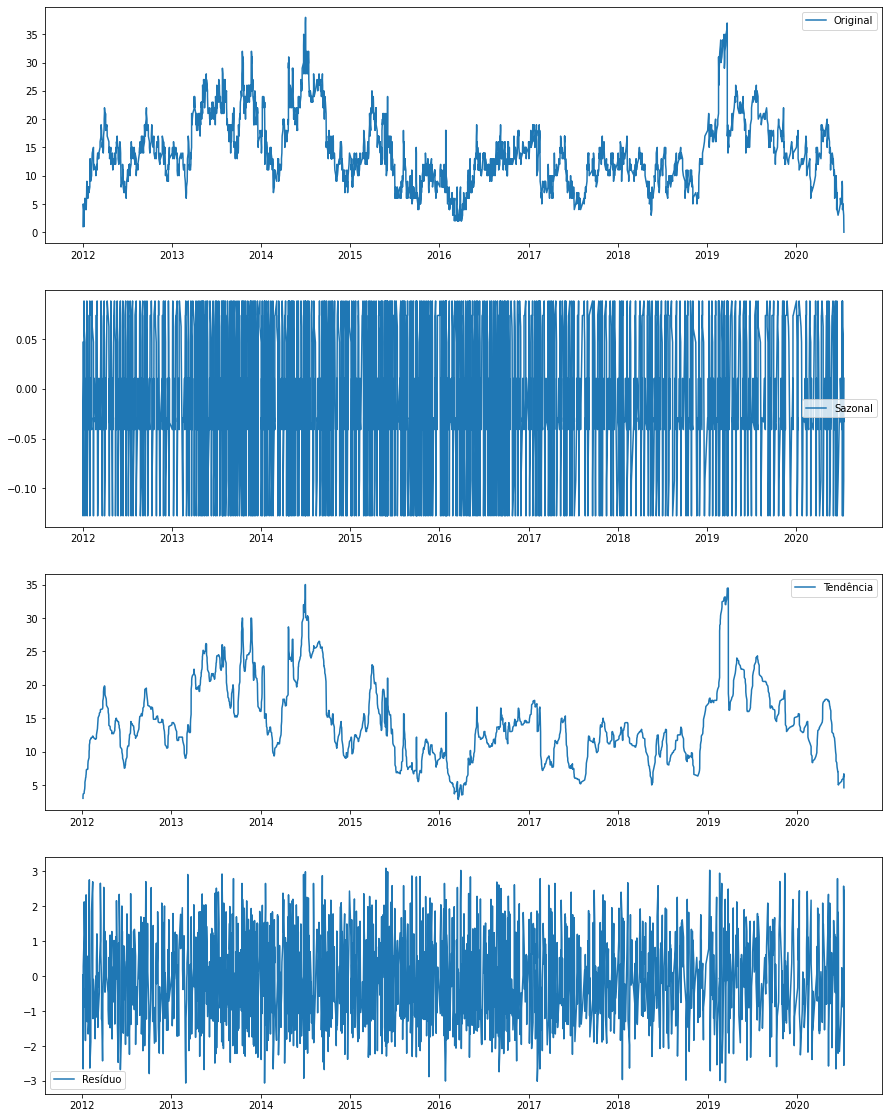

In [36]:
fig, ax = plt.subplots(4,1,figsize=[15,20])
ax[0].plot(ts.index.get_level_values(0),ts,label='Original')
ax[0].legend()
ax[1].plot(ts.index.get_level_values(0),decomp.seasonal,label='Sazonal')
ax[1].legend()
ax[2].plot(ts.index.get_level_values(0),decomp.trend,label='Tendência')
ax[2].legend()
ax[3].plot(ts.index.get_level_values(0),decomp.resid,label='Resíduo')
ax[3].legend()

# Previsão

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
ts2 = ts2.droplevel(1)

In [39]:
ts2

Data
2012-01-02 11:54:53.000     1
2012-01-02 16:08:10.000     2
2012-01-02 16:09:52.000     3
2012-01-03 08:42:03.000     4
2012-01-03 14:17:22.000     5
                           ..
2020-02-22 21:08:37.085    12
2020-02-27 10:38:06.634    13
2020-02-27 12:54:52.969    12
2020-02-27 15:08:37.085    11
2020-02-27 15:38:06.634    10
Name: Taxa de Quebra, Length: 3432, dtype: int32

In [40]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha= 0.05)
adf_test.should_diff(ts2)

(0.01, False)

In [41]:
ts4 = ts.loc['2020-03':,:]
ts4 = ts4.droplevel(1)

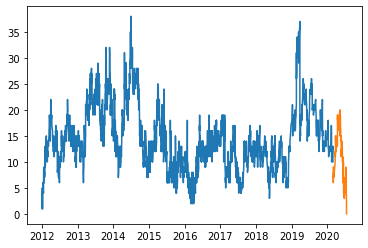

In [42]:
plt.plot(ts2)
plt.plot(ts4)

In [53]:
# from pmdarima.arima import auto_arima
# arima_model = auto_arima(ts2,start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=12140.953, BIC=12153.227, Time=2.097 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=11054.921, BIC=11079.470, Time=12.505 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=9688.886, BIC=9713.435, Time=48.826 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=12138.962, BIC=12145.099, Time=0.308 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=12032.961, BIC=12051.373, Time=1.409 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=10688.541, BIC=10719.227, Time=19.083 seconds
Fit ARIMA(1,1,0)x(3,1,0,12) [intercept=True]; AIC=10427.370, BIC=10464.192, Time=33.897 seconds
Fit ARIMA(1,1,0)x(4,1,0,12) [intercept=True]; AIC=10300.039, BIC=10342.998, Time=79.929 seconds
Fit ARIMA(1,1,0)x(5,1,0,12) [inter

C:\Users\Marcelo\Anaconda3\envs\GETS\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,0)x(4,1,1,12) [intercept=True]; AIC=9689.046, BIC=9738.143, Time=506.793 seconds
Near non-invertible roots for order (1, 1, 0)(4, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(5,1,0,12) [intercept=True]; AIC=10260.890, BIC=10303.850, Time=120.669 seconds
Fit ARIMA(2,1,0)x(5,1,0,12) [intercept=True]; AIC=10169.340, BIC=10224.574, Time=395.922 seconds
Fit ARIMA(1,1,1)x(5,1,0,12) [intercept=True]; AIC=10169.349, BIC=10224.583, Time=239.646 seconds
Fit ARIMA(0,1,1)x(5,1,0,12) [intercept=True]; AIC=10171.436, BIC=10220.533, Time=264.735 seconds


C:\Users\Marcelo\Anaconda3\envs\GETS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Marcelo\Anaconda3\envs\GETS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,1,1)x(5,1,0,12) [intercept=True]; AIC=10169.962, BIC=10231.333, Time=535.386 seconds
Total fit time: 3425.905 seconds


In [54]:
# arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3432
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -4840.443
Date:                            Fri, 24 Jul 2020   AIC                           9688.886
Time:                                    20:25:35   BIC                           9713.435
Sample:                                         0   HQIC                          9697.658
                                           - 3432                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.524      0.600      -0.001       0.000
ma.L1          0.1562      0.025      6.162      0.000       0.107       0.206
ma.S.L12      -0.9997      0.100     -9.972      0.000      -1.196      -0.803
sigma2         0.9743      0.164      5.950      0.000       0.653       1.295
===================================================================================
Ljung-Box (Q):                       69.64   Jarque-Bera (JB):               485.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.00
Prob(H) (two-sided):                  0.87   Kurtosis:                         1.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
ts_train = ts2.resample('M').mean()
ts_test = ts4.resample('M').mean()

(0,1,1)

In [46]:
modelo = ARIMA(ts_train, order=(0,1,1))
modelo_treinado = modelo.fit()

In [47]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Taxa de Quebra   No. Observations:                   97
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -262.101
Method:                       css-mle   S.D. of innovations              3.608
Date:                Mon, 27 Jul 2020   AIC                            530.202
Time:                        12:05:01   BIC                            537.926
Sample:                    02-29-2012   HQIC                           533.325
                         - 02-29-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0733      0.378      0.194      0.846      -0.668       0.815
ma.L1.D.Taxa de Quebra     0.0330      0.104      0.318      0.751      -0.170       0.236
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -30.3410           +0.0000j           30.3410            0.5000
-----------------------------------------------------------------------------
"""

In [70]:
previsoes = modelo_treinado.forecast(steps=12)

In [63]:
ts_train[-10:]

Data
2019-05-31    22.700000
2019-06-30    17.185185
2019-07-31    23.260870
2019-08-31    20.333333
2019-09-30    17.333333
2019-10-31    16.000000
2019-11-30    16.366667
2019-12-31    13.909091
2020-01-31    14.388889
2020-02-29    13.200000
Freq: M, Name: Taxa de Quebra, dtype: float64

In [71]:
previsoes

(array([13.23121457, 13.30456333, 13.37791209, 13.45126084, 13.5246096 ,
        13.59795836, 13.67130712, 13.74465587, 13.81800463, 13.89135339,
        13.96470214, 14.0380509 ]),
 array([ 3.60790744,  5.1871165 ,  6.38712448,  7.39489964,  8.2809252 ,
         9.08090875,  9.8159098 , 10.49958412, 11.14138449, 11.74817559,
        12.32512926, 12.87625694]),
 array([[  6.15984594,  20.30258321],
        [  3.1380018 ,  23.47112486],
        [  0.85937814,  25.89644604],
        [ -1.04247611,  27.9449978 ],
        [ -2.70570555,  29.75492475],
        [ -4.20029574,  31.39621245],
        [ -5.56752257,  32.9101368 ],
        [ -6.83415086,  34.32346261],
        [ -8.0187077 ,  35.65471696],
        [ -9.13464766,  36.91735444],
        [-10.19210732,  38.1215116 ],
        [-11.19894896,  39.27505076]]))

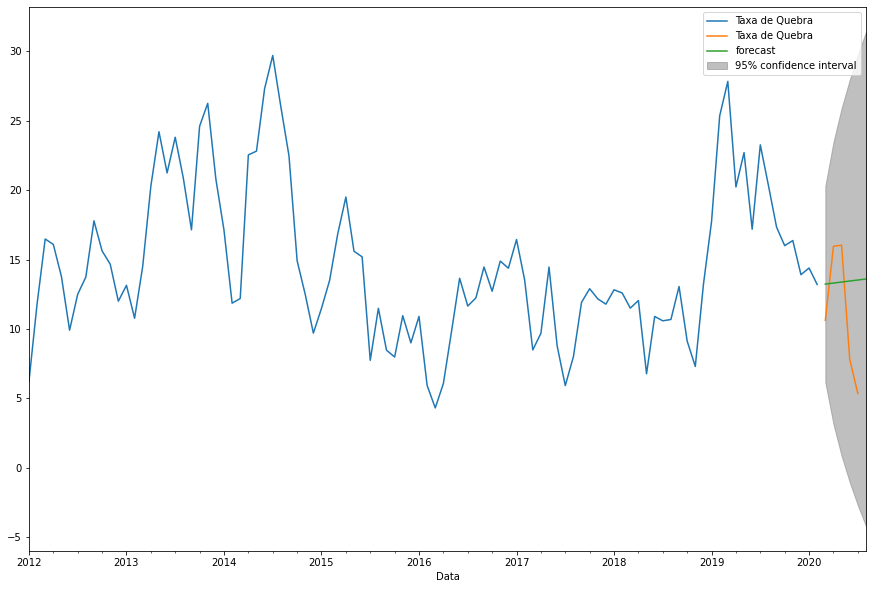

In [78]:
fig, ax = plt.subplots(figsize=[15,10])
ax = ts_train.loc['2012-01':].plot(ax=ax)
ax = ts_test.plot(ax=ax)
fig = modelo_treinado.plot_predict('2020-03', '2020-08', dynamic=True, ax=ax, plot_insample=False)

In [89]:
# predicao = pd.DataFrame(arima_model.predict(n_periods=20),index=ts4.index)
# prediction.columns = ['predicted']
# prediction

In [88]:
# modelo = ARIMA(ts2, order=(2,1,2))
# modelo_treinado = modelo.fit()

### Tempo indisponível

Organiza dados por data de abertura da OS e numero da OS

In [26]:
whole_data = whole_data.set_index(['Abertura','Núm. O.S.'])
whole_data = whole_data.sort_index()

Elimina duplicatas

In [27]:
whole_data[whole_data.index.duplicated()]

,,Unid. Saúde,Núm.Orgão,Classe,Encerramento,Patrimônio,N. Série,Tipo Equip.,Marca,Duração (horas),Tempo SOS-OSP (horas),Indisponibilidade (horas),Processada
Abertura,Núm. O.S.,,,,,,,,,,,,
2018-05-01 15:34:43.761,18.2408,HC,15.10.15.00.00.00.00,Manutenção Corretiva,2018-10-26 08:40:41.019,15/46768,0014033,MESA CIRURGICA,SCHMITZ,4265,4244,4261,False
2020-05-01 18:19:08.954,20.1539,HC,15.10.02.01.06.00.00,Manutenção Corretiva,2020-05-08 17:02:31.955,737932,MT75-06374,VENTILADOR UTI,AIR LIQUIDE,166,165,165,False


In [28]:
whole_data = whole_data[~whole_data.index.duplicated()]

Seleciona parâmetros de interesse: Indisponibilidade, Tipo de Equip e Classe

In [29]:
indisponib = whole_data[['Indisponibilidade (horas)','Tipo Equip.','Classe']]

In [30]:
indisponib

,,Indisponibilidade (horas),Tipo Equip.,Classe
Abertura,Núm. O.S.,,,
2012-01-02 08:36:56.000,12.2000,216,BOMBA INFUSAO USO GERAL,Manutenção Corretiva
2012-01-02 09:27:09.000,12.9000,24,MONITOR VIDEO,Manutenção Corretiva
2012-01-02 09:55:09.000,12.1300,1056,ESFIGMOMANOMETRO MERCURIO,Manutenção Corretiva
2012-01-02 11:54:53.000,12.1500,1272,VENTILADOR UTI,Manutenção Corretiva
2012-01-02 11:57:40.000,12.1700,1752,VENTILADOR PORTATIL DOMICILIAR,Manutenção Corretiva
...,...,...,...,...
2020-07-10 16:26:35.934,20.2317,64,ESFIGMOMANOMETRO ANEROIDE,Instalação
2020-07-13 09:23:24.451,20.2319,0,WORKSTATION,Manutenção Corretiva
2020-07-13 13:38:18.666,20.2321,1,VENTILADOR UTI,Manutenção Corretiva


Adiciona coluna contendo mes e ano da abertura de cada OS

In [77]:
pd.set_option('mode.chained_assignment',None) #retira warning de alocação
indisponib.loc[:,'Ano-Mes'] = pd.to_datetime(whole_data.index.get_level_values(0)).strftime('%Y-%m')

In [78]:
indisponib

,,Indisponibilidade (horas),Tipo Equip.,Classe,Ano-Mes
Abertura,Núm. O.S.,,,,
2012-01-02 08:36:56.000,12.2000,216,BOMBA INFUSAO USO GERAL,Manutenção Corretiva,2012-01
2012-01-02 09:27:09.000,12.9000,24,MONITOR VIDEO,Manutenção Corretiva,2012-01
2012-01-02 09:55:09.000,12.1300,1056,ESFIGMOMANOMETRO MERCURIO,Manutenção Corretiva,2012-01
2012-01-02 11:54:53.000,12.1500,1272,VENTILADOR UTI,Manutenção Corretiva,2012-01
2012-01-02 11:57:40.000,12.1700,1752,VENTILADOR PORTATIL DOMICILIAR,Manutenção Corretiva,2012-01
...,...,...,...,...,...
2020-07-10 16:26:35.934,20.2317,64,ESFIGMOMANOMETRO ANEROIDE,Instalação,2020-07
2020-07-13 09:23:24.451,20.2319,0,WORKSTATION,Manutenção Corretiva,2020-07
2020-07-13 13:38:18.666,20.2321,1,VENTILADOR UTI,Manutenção Corretiva,2020-07


Seleciona equipamento (ventilador UTI) e classe (manutenção corretiva)

In [62]:
is_ventilador = indisponib['Tipo Equip.']=='VENTILADOR UTI'
is_corretiva = indisponib['Classe']=='Manutenção Corretiva'

Plota a mediana da quantidade de horas que o ventilador ficou em manutenção em função da data (mes e ano) de abertura da OS

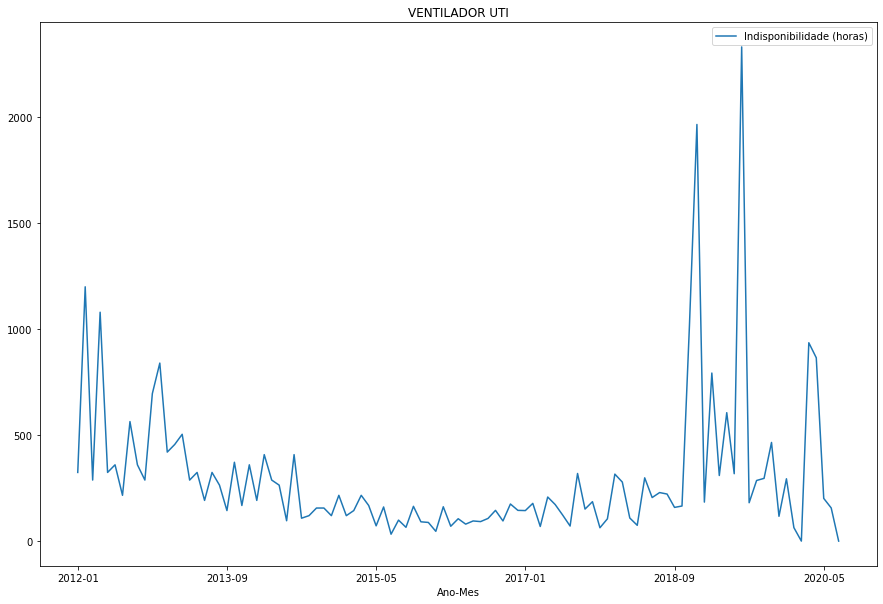

In [66]:
indisponib[is_ventilador & is_corretiva].groupby('Ano-Mes').aggregate(np.median).plot(figsize=[15,10],title='VENTILADOR UTI')